### BADASS Analysis: small molecules

##### Can we reduce the array of 48 barrels whilst maintaining model accuracy?

In [1]:
from subroutines.parse_array_data import ParseArrayData
from subroutines.train import RunML

In [2]:
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import OrderedDict
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, cohen_kappa_score, confusion_matrix
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.multiclass import unique_labels

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size

#### Parse in input data

Large array amino acid data

In [5]:
l_aa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/All_small_molecules/Large_array/AAs',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/All_small_molecules/Large_array/AAs already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Paper_analysis/All_small_molecules/Large_array/AAs?y


Large array fatty acid data

In [6]:
l_fa_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/All_small_molecules/Large_array/FAs',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/All_small_molecules/Large_array/FAs already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Paper_analysis/All_small_molecules/Large_array/FAs?y


Large array sugar data

In [7]:
l_sugar_fluor_data = ParseArrayData(
    dir_path='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/',
    repeat_names=['repeat_1', 'repeat_2', 'repeat_3', 'repeat_4', 'repeat_5', 'repeat_6', 'repeat_7', 'repeat_8',
                  'repeat_9', 'repeat_10'],
    peptide_list=['No Pep', 'CCPent', 'QLKEIA', 'CCHex2-I24K', 'CCHept-I24N', 'CCHept-L28W',
                  'GRP22', 'CCHex', 'NLKEIA', 'CCHept-L28K', 'CCHept-I24T', 'CCHept-L7Y',
                  'GRP35', 'CCHex2', 'CCHept-I17G-L21G', 'CCHept-I17H', 'CCHept-I24H', 'CCHept-L28Y',
                  'GRP46', 'CCHept', 'CCHept-I17A-L21A', 'CCHept-I17K-L24E', 'CCHept-L21S-I24S', 'CCHept-I24Y',
                  'GRP51', 'CCHept-I24D', 'CCHept-L14A', 'CCHept-L7K', 'CCHept-L21N-I24N', 'CCHept-L21S-I24Y',
                  'GRP52', 'CCHept-I24E', 'CCHept-L21A', 'CCHept-L21K-I24E', 'CCHept-L21T-I24T', 'CCHept-L21Y-I24S',
                  'GRP63', 'CCHept-I24K', 'CCHept-L21K', 'CCHept-L21E-I24K', 'CCHept-L21H-I24H', 'CCHept-I17T',
                  'GRP80', 'CCHept-I17K', 'CCPent-I24K', 'CCHept-I24S', 'CCHept-L7W', 'CCHept-I24P'],
    results_dir='Paper_analysis/All_small_molecules/Large_array/Sugars',
    control_peptides=['GRP35'],
    control_analytes=[]
)

Directory Paper_analysis/All_small_molecules/Large_array/Sugars already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite Paper_analysis/All_small_molecules/Large_array/Sugars?y


Locate xlsx files

In [8]:
l_aa_fluor_data.group_xlsx_repeats()

In [9]:
l_fa_fluor_data.group_xlsx_repeats()

In [10]:
l_sugar_fluor_data.group_xlsx_repeats()

Read the data in each xlsx file into a dataframe and perform min-max scaling

In [11]:
l_aa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/W_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/S_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/E_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/R_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Reformatted_AA_csvs/V_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/AAs/Refo

In [12]:
l_fa_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_1.xlsx
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/B_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/D_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/N_repeat_10.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/O_repeat_10.xlsx
 WARNING - fluorescence of (O + GRP52 + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
 WARNING - fluorescence of (O + CCPent-I24K + DPH) is less than fluorescence of (O + DPH) alone. Analysis will continue but please CHECK YOUR DATA. 
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/FAs/Reformatted_FA_csvs/P_repeat_10.xlsx


In [13]:
l_sugar_fluor_data.xlsx_to_scaled_df('No Pep')

Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/man_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/fru_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/gluam_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/mal_repeat_1.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/mal_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Large_array_data/Sugars/Reformatted_Sugar_csvs/glu_repeat_2.xlsx
Parsing plate /Users/ks17361/Lab_work_D

Combines readings of the same analyte solution across different plates, then calculates the median reading for non-independent repeats of the same analyte 

In [14]:
l_aa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: R, 8 (flagged readings = QLKEIA: 1.1058902102013586, NLKEIA: 0.6432415609183197, CCHex2: 0.44921957754392083, CCHept: 0.38990660557669954) 
 Outlier excluded from final output dataset: R, 6 (flagged readings = CCPent-I24K: 0.36275988972394413) 
 Outlier excluded from final output dataset: E, 3 (flagged readings = CCHept-I17A-L21A: 0.4913996193607859) 


In [15]:
l_fa_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: O, 8 (flagged readings = CCPent: 0.715122226981689, CCHex2-I24K: 0.7298984369220832, CCHept-I24N: 1.025850279828279, CCHept-L28W: 0.8024693953235129, GRP22: 0.4201989443293729, CCHex: 0.8009377936104601, NLKEIA: 0.4503762960705691, CCHept-L28K: 0.9199052057237955, CCHept-I24T: 0.7484094789503426, CCHept-L7Y: 1.038708261859428, CCHex2: 0.25144269999691565, CCHept-I17G-L21G: 0.5025020784268767, CCHept-I17H: 1.0242690436554487, CCHept-I24H: 0.7386291285565466, CCHept-L28Y: 0.8168417069884344, CCHept-I17A-L21A: 0.7117407900052798, CCHept-L21S-I24S: 0.9652350222314914, CCHept-I24Y: 0.9273765511080094, GRP51: 0.5679799449632448, CCHept-I24D: 0.7141826909380344, CCHept-L14A: 0.6959533474811951, CCHept-L7K: 1.1402495043637098, CCHept-L21N-I24N: 0.7200170187269314, CCHept-L21S-I24Y: 0.9440319306961015, GRP52: 0.6552047682340516, CCHept-I24E: 0.7892347226434583, CCHept-L21A: 1.0553677950365852, CCHept-L21K-I24E: 1.0389470886672, CCHept-L21T-I24T: 0.65

In [16]:
l_sugar_fluor_data.combine_plate_readings(outlier_excl_thresh=0.001, drop_thresh=1)

 Outlier excluded from final output dataset: mal, 0 (flagged readings = CCHept-I24T: 0.7235089423170673) 


In [17]:
l_aa_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   1.026325  1.053571     1.034778     1.010514     1.004756  0.943744   
1   1.014910  0.937853     0.930433     1.044855     0.979722  0.866931   
2   1.176067  1.006849     0.934257     1.019873     0.980434  0.928815   
3   0.968238  0.878641     0.837904     0.888387     0.931401  0.876360   
4   1.011632  0.712166     0.864056     0.987900     0.964710  0.818861   
5   0.989725  1.139130     0.873952     0.977018     0.918447  0.814248   
6   0.981264  1.000000     0.915024     1.019939     0.934679  0.832860   
7   0.982294  1.044248     0.879690     0.876849     0.931399  0.859980   
8   0.923840  1.520000     0.870054     0.854396     0.912125  0.795706   
9   1.042266  1.515723     0.886029     0.936381     0.949879  0.896599   
10  1.047779  2.000000     0.837868     1.015947     0.963729  0.910207   
11  0.991597  1.801587     0.662736     0.934360     0.852408  0.770376   
12  1.093379  1.730159     0.874666     1.048089     0.966698  0.982941   
13  1.081413  1.774390     1.068866     1.002002     0.983173  0.892411   
14  1.002247  1.598592     0.705118     0.940705     0.880726  0.744251   
15  1.072340  1.707692     0.693902     1.063752     0.897467  0.827298   
16  1.103635  1.832000     0.511031     1.113429     0.929349  0.640744   
17  1.060091  1.613095     0.716846     1.120461     0.956522  0.753939   
18  0.976109  0.850746     0.911490     0.960519     0.993028  0.949563   
19  1.172955  0.856322     0.968225     1.041973     0.970500  1.007900   
20  1.055407  0.858382     1.057894     1.067557     0.984581  0.936560   
21  1.033773  1.066079     0.997548     1.026339     0.945068  0.916875   
22  1.095672  1.024793     1.020617     1.061357     0.936312  0.942782   
23  1.001981  1.176471     0.935011     0.997896     0.916484  0.776465   
24  0.920046  0.851562     0.942115     0.968176     0.925701  0.927754   
25  0.878257  0.795620     0.935411     0.880725     0.875303  0.872184   
26  1.011153  0.992958     0.941305     0.888402     0.861906  0.918112   
27  1.046260  1.059459     0.943384     1.057794     0.971638  0.967880   
28  1.014316  0.854331     0.909236     0.917590     0.947695  0.990762   
29  1.015829  1.126374     0.996728     0.998135     0.963210  0.869580   
30  0.979676  0.954023     0.918322     0.922812     0.931199  0.930238   
31  1.025877  1.041667     0.925442     1.015227     1.000965  0.839242   
32  0.895242  0.786667     0.936800     0.814494     0.901722  0.918179   
33  1.041915  1.138614     0.960142     0.909119     0.947007  0.806508   
34  1.030931  1.311475     0.920490     0.989673     0.881294  0.964213   
35  1.009954  1.144509     1.077996     1.026483     0.999738  0.940467   
36  0.882853  0.579439     0.939586     0.939522     0.853172  0.911123   
37  1.051879  0.905797     1.121725     1.098495     1.014482  0.942035   
38  1.149086  0.683616     0.934032     1.057975     0.934924  0.951269   
39  0.941075  0.780423     0.850063     0.971042     0.986674  0.783746   
40  1.010064  0.905797     0.887739     1.090656     0.945020  0.972455   
41  1.046074  1.068182     0.966707     0.995206     0.935573  0.802243   
42  0.981874  1.087838     1.009571     1.025349     0.937250  0.900656   
43  1.037135  1.000000     0.923944     0.972539     0.928397  0.886508   
44  0.965096  0.994536     0.990409     1.032959     0.949301  0.906921   
45  1.036483  0.880795     0.864968     1.047196     0.959202  0.906947   
46  1.012070  1.132075     1.048700     1.104314     0.981594  0.948993   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.020925  0.959427     1.004524     1.008347  ...          0.807070   
1   0.960059  0.924038     1.011650     1.078104  ...          0.879224   
2   1.055619  0.931324     1.066850     1.009037  ...          0.850430   
3   0.963258  0.816671     0.912440     0.923009  ...          0.911353   
4   0.919994  0.902752     0.9

In [18]:
l_fa_fluor_data.ml_fluor_data

CCPent     QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.062063   1.681818     0.008750     0.097138     0.173016  0.019171   
1   0.066087   1.538462     0.006339     0.079017     0.258288  0.018406   
2   0.081692   1.381910     0.005407     0.075357     0.321024  0.022406   
3   0.071201   1.640351     0.003875     0.063482     0.296945  0.022983   
4   0.081579   1.631944     0.006465     0.066950     0.194404  0.024451   
5   0.057734   1.833333     0.011801     0.114172     0.223357  0.016017   
6   0.044842   0.839080     0.005967     0.135403     0.148415  0.010459   
7   0.047362   1.020833     0.005980     0.103364     0.159434  0.012905   
8   0.055282   1.210884     0.008792     0.086595     0.160268  0.015657   
9   0.148266  10.898551     0.046587     0.303799     0.120764  0.024628   
10  0.150689   8.616352     0.031308     0.269366     0.122485  0.022403   
11  0.134739   9.131387     0.042102     0.251902     0.099580  0.022347   
12  0.144157   8.353846     0.032018     0.195077     0.091621  0.023343   
13  0.140496   6.680233     0.035256     0.217786     0.091910  0.027553   
14  0.170604   5.456000     0.014097     0.117293     0.102808  0.025129   
15  0.179082   3.084112     0.021682     0.138316     0.127927  0.026663   
16  0.177250   3.764368     0.047508     0.149798     0.103648  0.027803   
17  0.159486   3.953846     0.016181     0.101732     0.095983  0.024939   
18  0.903368   1.453901     0.554593     1.190752     1.075472  0.489449   
19  0.855617   0.685393     0.576447     1.255267     1.058119  0.540944   
20  1.052817   0.842105     0.963315     1.332277     1.042014  0.515465   
21  0.996725   1.167513     0.710384     1.417928     1.059033  0.515466   
22  0.894747   1.079545     0.732024     1.409620     1.108137  0.502970   
23  0.877188   1.007042     0.679841     1.231749     1.040937  0.502865   
24  0.889601   1.029070     0.719770     1.106825     1.105547  0.487414   
25  0.881351   1.024096     0.678937     1.304746     1.131148  0.533250   
26  0.857674   1.014085     0.818040     1.231109     1.106649  0.484938   
27  0.845154   1.305085     0.698801     1.261290     1.081986  0.490687   
28  1.022571   0.952756     0.753516     1.087744     0.998670  0.631529   
29  1.176855   1.125714     0.652254     1.008486     1.148558  0.657004   
30  1.004083   1.343511     0.757447     1.124091     1.094118  0.668542   
31  0.932209   1.280000     0.688117     0.967367     1.057789  0.697742   
32  0.924206   1.282759     0.777142     1.084270     1.037485  0.685886   
33  0.948754   1.227273     0.878522     1.004671     1.018159  0.698780   
34  1.046289   1.159722     0.832239     1.103595     1.166603  0.720903   
35  1.004783   0.975976     0.861914     1.155559     1.204928  0.726710   
36  1.011156   0.794444     0.790489     1.114545     1.145403  0.732104   
37  0.979291   0.993827     1.014856     1.062500     1.116327  0.744162   
38  0.045607   0.661202     0.006825     0.121669     0.420932  0.006803   
39  0.054125   0.739130     0.005830     0.132827     0.441681  0.006874   
40  0.055639   0.971631     0.006516     0.140290     0.554430  0.008491   
41  0.057048   0.572254     0.006358     0.133426     0.479014  0.009088   
42  0.056074   1.038043     0.009396     0.112380     0.304307  0.008337   
43  0.047794   1.297710     0.008264     0.109551     0.576740  0.009534   
44  0.060709   1.091892     0.009088     0.103913     0.457480  0.011653   
45  0.048991   0.601064     0.005819     0.096681     0.502240  0.007795   
46  0.053244   0.684932     0.006299     0.081320     0.455614  0.008914   
47  0.055839   0.805405     0.007068     0.100139     0.432981  0.009938   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   0.033922  0.015760     0.025135     0.072880  ...          0.035065   
1   0.025772  0.016326     0.030727     0.083970  ...          0.024957   
2   0.030396  0.017883     0.071625     0.104929  ...   

In [19]:
l_sugar_fluor_data.ml_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0   0.987514  0.877778     0.986988     1.059325     1.026094  0.989860   
1   1.099456  1.086331     1.057084     1.010606     0.974457  1.007267   
2   0.992739  0.766497     0.979408     0.893519     0.959103  0.946020   
3   0.978663  0.852041     0.896086     0.934067     0.900254  0.916977   
4   0.861934  0.977401     0.922746     0.881683     0.971275  0.921537   
5   1.007643  1.136842     0.984371     0.942875     0.958499  1.023786   
6   1.027008  0.987421     1.022222     0.988206     0.941795  0.899918   
7   0.967471  1.076923     0.875335     0.936435     0.885511  0.950167   
8   0.979685  1.123810     1.014942     0.996560     0.980422  0.901585   
9   1.003561  1.246269     0.901285     0.977691     0.906919  0.946258   
10  1.090924  0.761905     0.941823     0.953420     0.901014  0.980410   
11  0.922291  1.061644     0.874554     0.901049     0.901821  0.895090   
12  0.984411  0.866242     0.964744     0.927832     0.949204  0.918275   
13  0.957130  1.193182     0.848753     0.871554     0.904407  0.958908   
14  1.043279  0.815217     0.897529     0.964326     1.015679  0.870522   
15  0.942686  0.634146     0.958832     0.958229     0.973239  0.831853   
16  0.910304  0.787097     0.946507     0.920822     0.951738  0.967693   
17  1.065355  0.729032     0.979030     0.945389     0.904783  1.050744   
18  0.957442  0.787356     1.021690     0.991537     1.005895  0.918973   
19  1.065949  0.842105     0.929661     0.971606     0.985371  0.940908   
20  1.025125  0.923913     1.093705     0.977410     0.968770  0.835013   
21  0.927596  0.680982     0.902190     1.060440     0.934179  0.987044   
22  0.874801  1.381356     0.832338     0.915149     0.868800  0.972228   
23  1.073218  1.175879     0.781405     1.004598     0.960390  0.979444   
24  0.827491  1.294118     0.875478     0.907203     0.889089  0.971505   
25  0.920649  0.339806     0.945213     0.829368     0.940705  0.923421   
26  0.940694  0.992063     0.896260     0.907366     0.997346  0.862034   
27  1.072328  0.587097     1.038842     1.097082     0.985564  0.999299   
28  1.055340  0.980000     1.027093     1.023074     1.005902  1.012482   
29  0.982028  1.030864     0.929455     0.860856     0.982105  1.024211   
30  1.081686  1.201342     1.044965     1.023090     0.964595  1.000651   
31  1.022970  0.759804     1.006251     0.906501     0.949419  0.971398   
32  1.050763  0.672414     0.995274     0.907771     0.949867  0.947530   
33  1.071890  1.287500     1.026616     1.082397     1.004300  1.005241   
34  0.913383  0.714286     0.886249     0.978496     0.976694  0.853735   
35  0.948889  0.956522     0.914516     0.936120     0.886286  0.800457   
36  1.035721  1.330709     0.918044     0.990085     0.944822  1.053504   
37  0.922048  0.879518     0.917347     0.841628     0.860733  0.935251   
38  0.977739  0.824000     0.959244     0.935677     0.938273  0.932075   
39  1.010585  0.956311     0.985347     0.962564     0.892610  0.928648   
40  0.896438  0.796380     1.001264     0.955277     0.920431  0.908134   
41  0.933532  0.813433     0.917152     1.034626     0.934390  0.790661   
42  1.059771  1.039106     1.041573     1.029624     1.013708  0.962149   
43  1.033166  0.870370     0.951152     1.029202     0.941163  1.064842   
44  1.027387  0.901639     1.009946     0.974328     0.971336  0.995934   
45  0.941257  0.723404     0.887630     0.926377     0.979108  0.907382   
46  1.064028  0.914894     1.061253     0.992939     0.995103  0.987144   
47  1.071873  0.712871     1.063458     0.915420     1.028948  0.874440   
48  0.928307  1.080000     0.917863     0.918256     0.833694  0.960239   

       CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21E-I24K  \
0   1.001767  0.993522     1.032377     0.964796  ...          0.987603   
1   0.985131  1.056828     1.002928     1.045810  ...          0.954896   
2   0.938332  0.915374     0.9

Changes analyte name to "FA", "AA" or "S" as appropriate, then concatentates the dataframes into a single dataset

In [20]:
l_aa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_aa_fluor_data.ml_fluor_data['Analyte'].tolist())
l_aa_fluor_data.ml_fluor_data['Analyte'] = ['AA']*l_aa_fluor_data.ml_fluor_data.shape[0]

In [21]:
l_fa_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_fa_fluor_data.ml_fluor_data['Analyte'].tolist())
l_fa_fluor_data.ml_fluor_data['Analyte'] = ['FA']*l_fa_fluor_data.ml_fluor_data.shape[0]

In [22]:
l_sugar_fluor_data.ml_fluor_data['Orig_analyte'] = copy.deepcopy(l_sugar_fluor_data.ml_fluor_data['Analyte'].tolist())
l_sugar_fluor_data.ml_fluor_data['Analyte'] = ['S']*l_sugar_fluor_data.ml_fluor_data.shape[0]

In [23]:
l_small_mol_fluor_data = pd.concat([l_fa_fluor_data.ml_fluor_data, l_aa_fluor_data.ml_fluor_data,
                                    l_sugar_fluor_data.ml_fluor_data],
                                   axis=0, ignore_index=True)

In [24]:
l_small_mol_fluor_data

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W     GRP22  \
0    0.062063  1.681818     0.008750     0.097138     0.173016  0.019171   
1    0.066087  1.538462     0.006339     0.079017     0.258288  0.018406   
2    0.081692  1.381910     0.005407     0.075357     0.321024  0.022406   
3    0.071201  1.640351     0.003875     0.063482     0.296945  0.022983   
4    0.081579  1.631944     0.006465     0.066950     0.194404  0.024451   
..        ...       ...          ...          ...          ...       ...   
139  1.027387  0.901639     1.009946     0.974328     0.971336  0.995934   
140  0.941257  0.723404     0.887630     0.926377     0.979108  0.907382   
141  1.064028  0.914894     1.061253     0.992939     0.995103  0.987144   
142  1.071873  0.712871     1.063458     0.915420     1.028948  0.874440   
143  0.928307  1.080000     0.917863     0.918256     0.833694  0.960239   

        CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  CCHept-L21H-I24H  \
0    0.033922  0.015760     0.025135     0.072880  ...          0.365650   
1    0.025772  0.016326     0.030727     0.083970  ...          0.469274   
2    0.030396  0.017883     0.071625     0.104929  ...          0.426878   
3    0.027129  0.016442     0.037316     0.088115  ...          0.440355   
4    0.027895  0.018609     0.030466     0.080415  ...          0.344258   
..        ...       ...          ...          ...  ...               ...   
139  0.961308  0.996060     1.034497     0.971232  ...          0.910600   
140  0.891725  0.862607     0.926705     0.870372  ...          0.999486   
141  1.051739  1.027520     1.000963     0.996989  ...          0.985606   
142  0.908308  0.960971     0.932968     0.939563  ...          1.063164   
143  0.985232  1.028891     0.910815     0.964734  ...          1.172741   

     CCHept-I17T     GRP80  CCHept-I17K  CCPent-I24K  CCHept-I24S  CCHept-L7W  \
0       0.213296  0.375742     0.238938     0.102177     0.022678    0.059512   
1       0.240680  0.299043     0.221085     0.141463     0.030179    0.085826   
2       0.316774  0.238025     0.200931     0.117407     0.036030    0.094918   
3       0.293020  0.171220     0.153200     0.035590     0.022797    0.083445   
4       0.285452  0.234367     0.233311     0.162162     0.027966    0.076380   
..           ...       ...          ...          ...          ...         ...   
139     0.935015  0.993792     0.979150     0.907119     1.003518    0.968177   
140     1.083903  1.074574     1.052406     1.060218     1.021646    1.066241   
141     0.914411  0.998112     1.131072     0.964238     0.945288    1.078439   
142     1.337191  0.984568     1.030290     1.141079     1.021976    1.149019   
143     1.180536  1.127309     1.058932     1.100540     0.931466    1.229961   

     CCHept-I24P  Analyte  Orig_analyte  
0       0.022065       FA             O  
1       0.028242       FA             O  
2       0.029392       FA             O  
3       0.020372       FA             O  
4       0.020973       FA             O  
..           ...      ...           ...  
139     0.955245        S           man  
140     1.088749        S           man  
141     0.981814        S           man  
142     1.113914        S           man  
143     0.962541        S           man  

[144 rows x 48 columns]

Generates "representative" fingerprint for each class (by calculating the median value for each feature)

FA


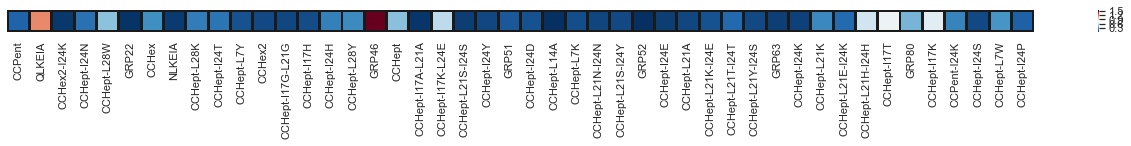

AA


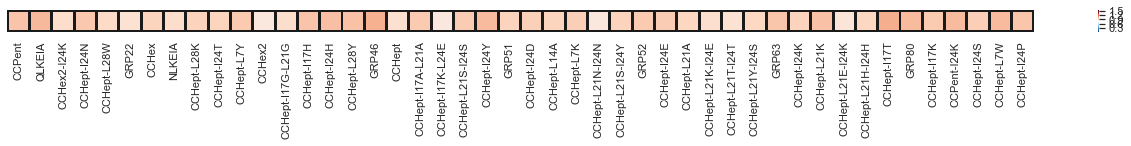

S


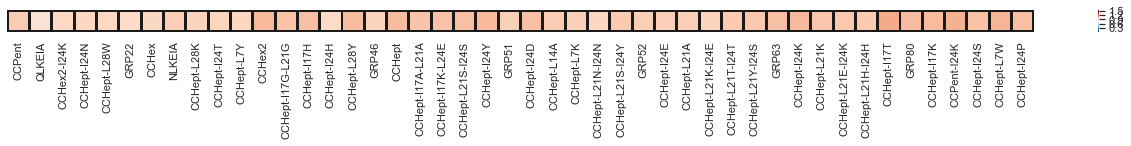

In [27]:
classes = []
for class_name in l_small_mol_fluor_data['Analyte'].tolist():
    if not class_name in classes:
        classes.append(class_name)

l_small_mol_fluor_data_x_val = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1)
class_median_x_val = []
for class_name in classes:
    class_indices = [n for n in range(l_small_mol_fluor_data.shape[0])
                     if l_small_mol_fluor_data['Analyte'][n] == class_name]
    class_median_x_val.append(np.median(l_small_mol_fluor_data_x_val.values[class_indices, :], axis=0))

vmin = np.amin(class_median_x_val)
vmax = np.amax(class_median_x_val)

for index, class_name in enumerate(classes):
    print(class_name)

    sns.set(rc={'figure.figsize':(23,0.4)})
    plt.clf()
    sns.heatmap(
        np.array([class_median_x_val[index]]), vmin=vmin, vmax=vmax, annot=False, cmap='RdBu_r', cbar=True,
        xticklabels=l_small_mol_fluor_data_x_val.columns, yticklabels=False, linecolor='k', linewidths=2
    )
    plt.savefig(
        'Paper_analysis/All_small_molecules/Large_array/{}_median_barrel_readings_heatmap.svg'.format(class_name)
    )
    plt.show()

Generates box plots to compare the distribution of values for each class across the 46 features

Amino acid


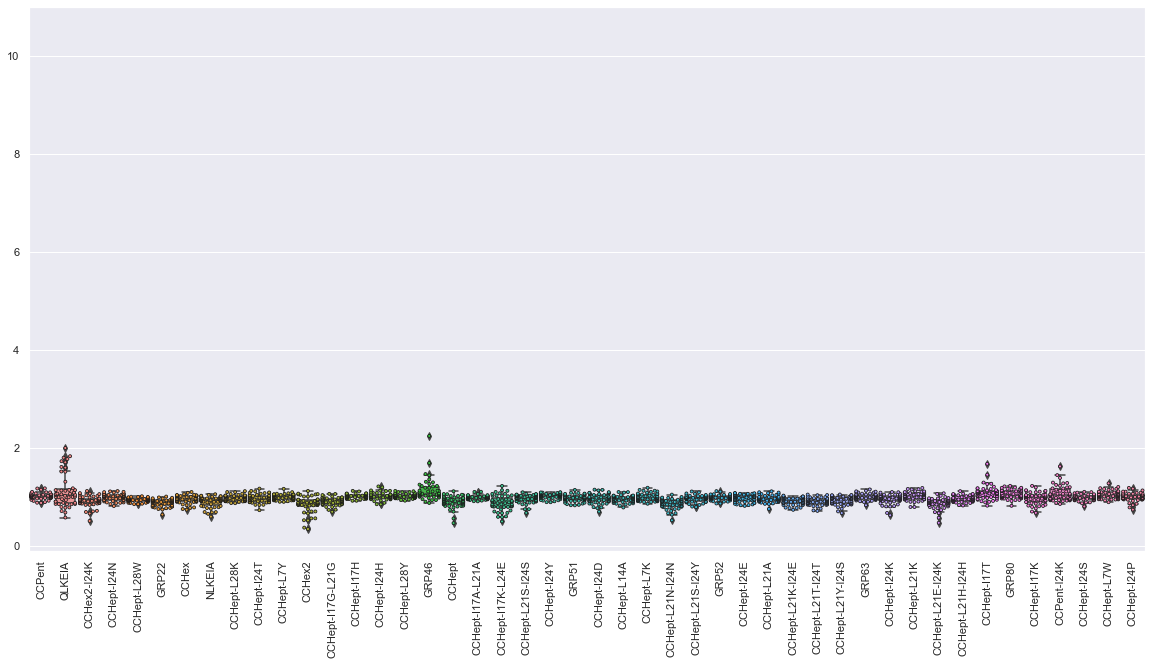

Fatty acid


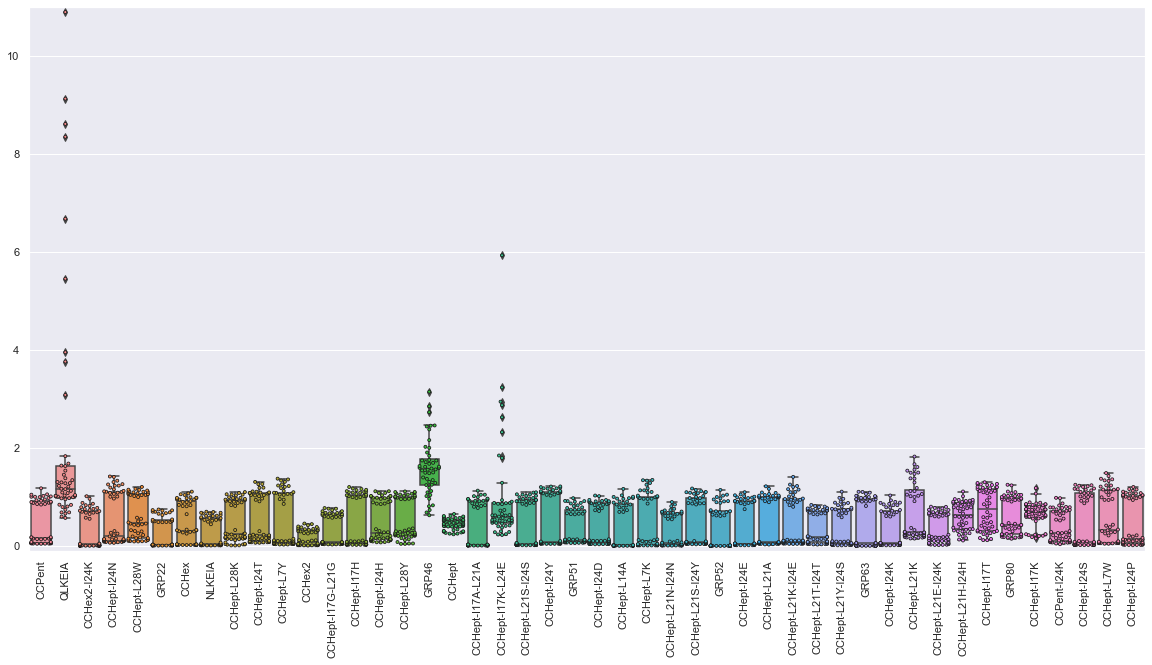

Sugar


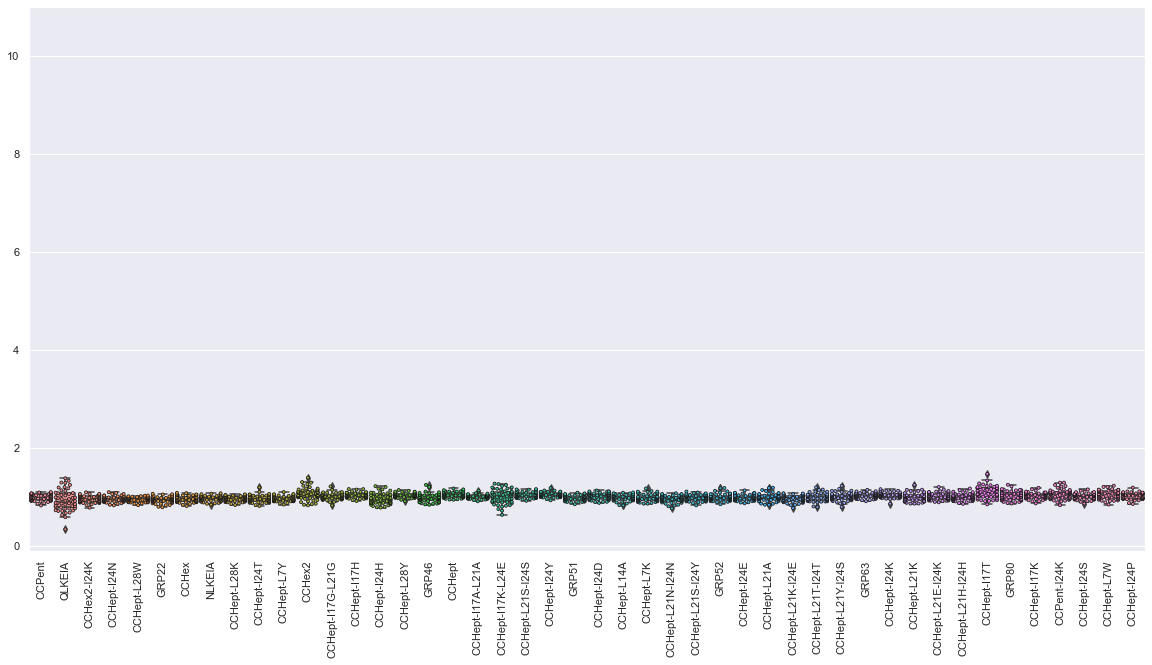

In [28]:
ymin = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).min().min() - 0.1
ymax = l_small_mol_fluor_data.drop(['Analyte', 'Orig_analyte'], axis=1).max().max() + 0.1

aa_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0]) if l_small_mol_fluor_data['Analyte'][i] == 'AA']
fa_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0]) if l_small_mol_fluor_data['Analyte'][i] == 'FA']
s_indices = [int(i) for i in range(l_small_mol_fluor_data.shape[0]) if l_small_mol_fluor_data['Analyte'][i] == 'S']

sns.set(rc={'figure.figsize':(20,10)})
print('Amino acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[aa_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[aa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('Paper_analysis/All_small_molecules/Large_array/Amino_acid_barrel_readings_boxplot.svg')
plt.show()

print('Fatty acid')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[fa_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[fa_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('Paper_analysis/All_small_molecules/Large_array/Fatty_acid_barrel_readings_boxplot.svg')
plt.show()

print('Sugar')
plt.clf()
plt.xticks(rotation=90)
plt.ylim(ymin, ymax)
sns.boxplot(data=l_small_mol_fluor_data.iloc[s_indices])
sns.swarmplot(data=l_small_mol_fluor_data.iloc[s_indices], size=3, edgecolor='k', linewidth=0.8)
plt.savefig('Paper_analysis/All_small_molecules/Large_array/Amino_acid_barrel_readings_boxplot.svg')
plt.show()

#### Run machine learning

In [30]:
plt.rcParams['figure.figsize'] = (10, 10)  # Sets default figure size
ml = RunML(
    results_dir='/Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Paper_analysis/All_small_molecules/'
                'Large_array_ML_results/',
    fluor_data=l_small_mol_fluor_data
)

Directory /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Paper_analysis/All_small_molecules/Large_array_ML_results/ already found in /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing
Overwrite /Users/ks17361/Lab_work_Dek_Woolfson/BADASS/array_sensing/Paper_analysis/All_small_molecules/Large_array_ML_results/?y


In [31]:
ml.split_train_test_data(randomise=True, percent_test=0, test_analytes=[])

- Visualise correlation between the initial 46 features

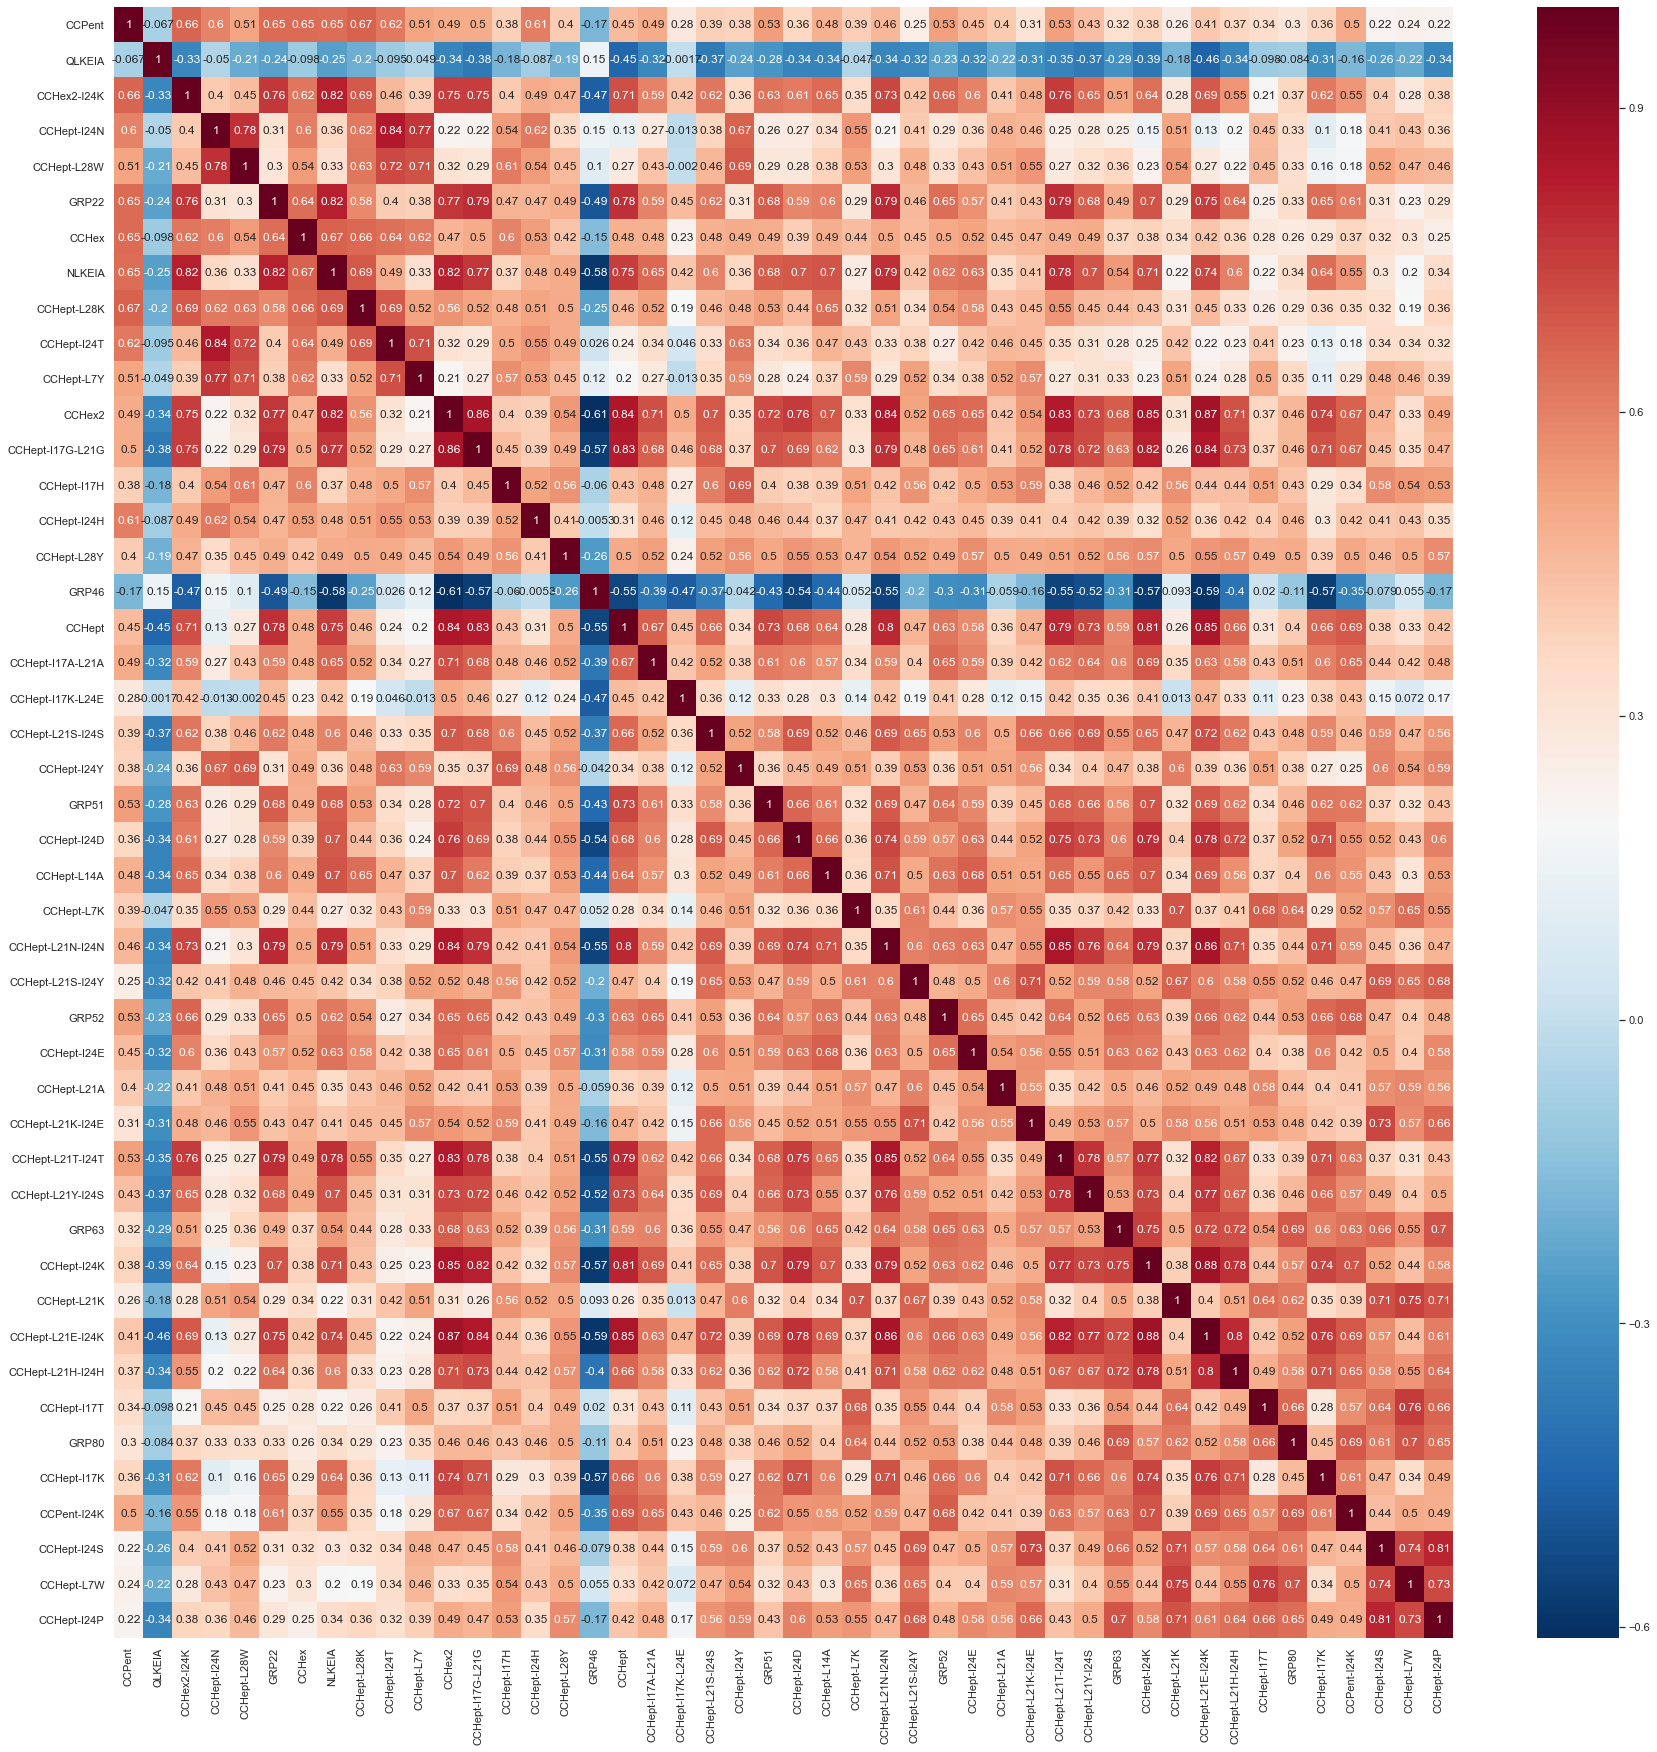

In [32]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
ml.calc_feature_correlations(train_data=ml.fluor_data)
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

- Measure the relative importances of the initial 46 features with ANOVA

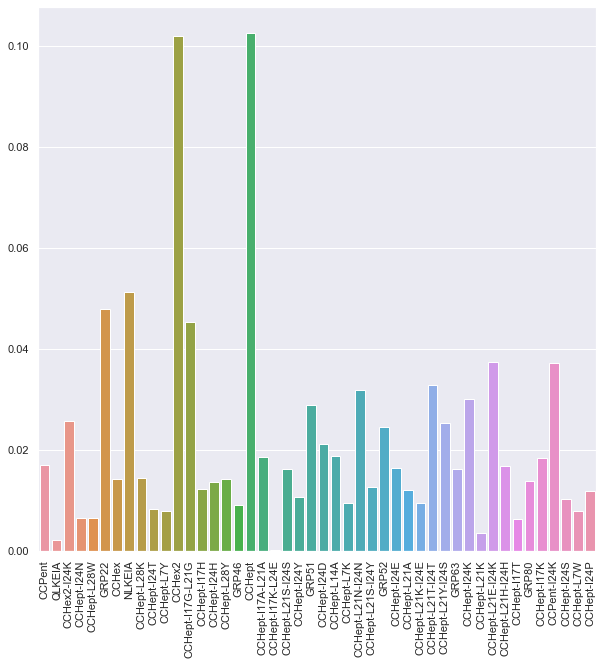

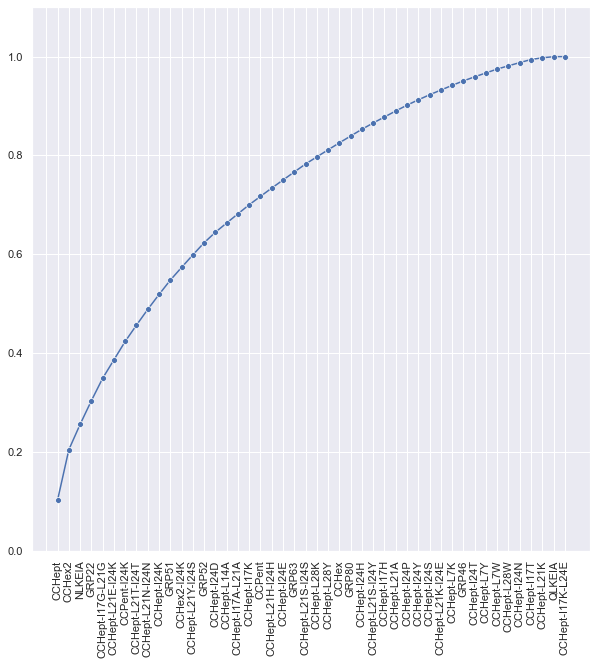

In [33]:
from sklearn.feature_selection import f_classif
f_classif_kbest_df = ml.calc_feature_importances_kbest(x=ml.x, y=ml.y, method_classif=f_classif)

In [34]:
print('Barrels ordered by ANOVA score:')
f_classif_top_barrels = f_classif_kbest_df.nlargest(n=46, columns='Score')
f_classif_top_barrels

Barrels ordered by ANOVA score:


Feature     Score
0             CCHept  0.102582
1             CCHex2  0.101994
2             NLKEIA  0.051283
3              GRP22  0.047909
4   CCHept-I17G-L21G  0.045369
5   CCHept-L21E-I24K  0.037327
6        CCPent-I24K  0.037272
7   CCHept-L21T-I24T  0.032909
8   CCHept-L21N-I24N  0.031886
9        CCHept-I24K  0.030134
10             GRP51  0.028952
11       CCHex2-I24K  0.025790
12  CCHept-L21Y-I24S  0.025338
13             GRP52  0.024620
14       CCHept-I24D  0.021217
15       CCHept-L14A  0.018744
16  CCHept-I17A-L21A  0.018532
17       CCHept-I17K  0.018361
18            CCPent  0.016974
19  CCHept-L21H-I24H  0.016810
20       CCHept-I24E  0.016323
21             GRP63  0.016245
22  CCHept-L21S-I24S  0.016164
23       CCHept-L28K  0.014357
24       CCHept-L28Y  0.014274
25             CCHex  0.014200
26             GRP80  0.013745
27       CCHept-I24H  0.013711
28  CCHept-L21S-I24Y  0.012698
29       CCHept-I17H  0.012157
30       CCHept-L21A  0.012128
31       CCHept-I24P  0.011780
32       CCHept-I24Y  0.010741
33       CCHept-I24S  0.010260
34  CCHept-L21K-I24E  0.009533
35        CCHept-L7K  0.009521
36             GRP46  0.009037
37       CCHept-I24T  0.008215
38        CCHept-L7Y  0.007897
39        CCHept-L7W  0.007836
40       CCHept-L28W  0.006579
41       CCHept-I24N  0.006481
42       CCHept-I17T  0.006242
43       CCHept-L21K  0.003506
44            QLKEIA  0.002226
45  CCHept-I17K-L24E  0.000140

- Measure the relative importances of the initial 46 features with decision trees

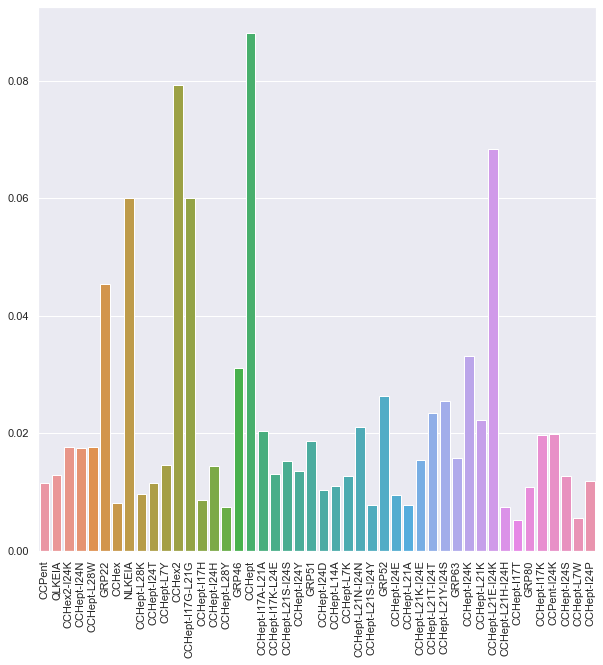

In [35]:
tree_feat_importances_df = ml.calc_feature_importances_tree(x=ml.x, y=ml.y)

In [36]:
print('Barrels ordered by tree score:')
tree_top_barrels = tree_feat_importances_df.nlargest(n=46, columns='Score')
tree_top_barrels

Barrels ordered by tree score:


Feature     Score
17            CCHept  0.088115
11            CCHex2  0.079265
37  CCHept-L21E-I24K  0.068384
7             NLKEIA  0.060077
12  CCHept-I17G-L21G  0.059985
5              GRP22  0.045379
35       CCHept-I24K  0.033071
16             GRP46  0.031175
28             GRP52  0.026357
33  CCHept-L21Y-I24S  0.025449
32  CCHept-L21T-I24T  0.023446
36       CCHept-L21K  0.022345
26  CCHept-L21N-I24N  0.021022
18  CCHept-I17A-L21A  0.020350
42       CCPent-I24K  0.019928
41       CCHept-I17K  0.019625
22             GRP51  0.018721
4        CCHept-L28W  0.017654
2        CCHex2-I24K  0.017594
3        CCHept-I24N  0.017440
34             GRP63  0.015829
31  CCHept-L21K-I24E  0.015399
20  CCHept-L21S-I24S  0.015249
10        CCHept-L7Y  0.014636
14       CCHept-I24H  0.014401
21       CCHept-I24Y  0.013542
19  CCHept-I17K-L24E  0.013042
1             QLKEIA  0.012832
25        CCHept-L7K  0.012762
43       CCHept-I24S  0.012697
45       CCHept-I24P  0.011807
0             CCPent  0.011607
9        CCHept-I24T  0.011503
24       CCHept-L14A  0.010985
40             GRP80  0.010913
23       CCHept-I24D  0.010272
8        CCHept-L28K  0.009597
29       CCHept-I24E  0.009495
13       CCHept-I17H  0.008714
6              CCHex  0.008182
27  CCHept-L21S-I24Y  0.007760
30       CCHept-L21A  0.007712
15       CCHept-L28Y  0.007524
38  CCHept-L21H-I24H  0.007465
44        CCHept-L7W  0.005513
39       CCHept-I17T  0.005179

- Run PCA to perform feature extraction and determine the number of features required to explain x% of the output signal

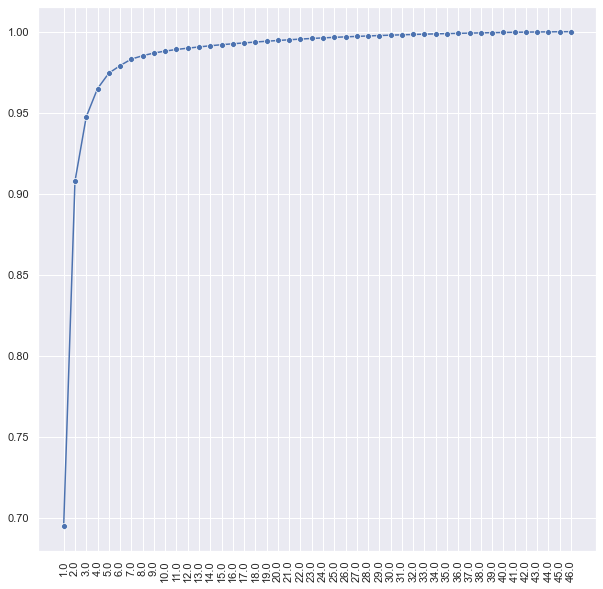

In [37]:
all_features_pca = ml.run_pca(x=ml.x)

~95% of the data can be explained by 3 features.

Contributions of the 46 barrels to each principal component (see the Scree plot above for how much of the signal in the data is explained by successive principal components)

In [38]:
pca_components = OrderedDict({'Component': [int(n) for n in range(1, 47)]})
for index, feature in enumerate(ml.features):
    pca_components[feature] = all_features_pca.components_[:,index]
pca_components = pd.DataFrame(pca_components)
pca_components = pca_components.set_index('Component', drop=True)

In [39]:
pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1         -0.141198  0.426805    -0.143105    -0.134209    -0.114679   
2          0.074364  0.836725     0.064789     0.071211     0.011332   
3         -0.040672 -0.198811     0.054278    -0.172285    -0.095725   
4          0.020697 -0.261596    -0.041602     0.094447     0.028415   
5          0.075977  0.011350     0.104387    -0.074989    -0.128836   
6         -0.204353 -0.016096    -0.174057    -0.218488    -0.140314   
7          0.185179 -0.042266    -0.051808    -0.027899     0.067812   
8         -0.068504  0.020367    -0.064461    -0.105002     0.175379   
9         -0.004741  0.018230     0.048507    -0.133411    -0.155829   
10         0.055843  0.016976     0.179469     0.075119     0.133777   
11        -0.066734  0.031682     0.299602    -0.186054     0.041321   
12         0.064860 -0.013496    -0.026549    -0.148931    -0.117169   
13         0.018553 -0.003874    -0.196490     0.041641    -0.135700   
14        -0.063860  0.009221    -0.133713    -0.155136    -0.165159   
15         0.125808 -0.031619    -0.070553    -0.005990    -0.036318   
16         0.034312  0.003132     0.376419     0.024821     0.213408   
17         0.076405  0.014606    -0.090256    -0.197409     0.073883   
18        -0.216358  0.028216    -0.134315    -0.116082     0.166875   
19         0.035106  0.027986    -0.181687    -0.036456     0.192796   
20         0.113285  0.002327    -0.000159    -0.156100     0.262068   
21         0.087898 -0.014843    -0.265976     0.079356     0.075977   
22        -0.006324  0.012333    -0.096945     0.042716    -0.125717   
23         0.146144 -0.006485    -0.152745    -0.075321    -0.037494   
24         0.085436  0.008023     0.080502     0.064949    -0.087256   
25         0.274579  0.004814     0.284741     0.006586    -0.228592   
26        -0.350771  0.007334     0.117456     0.170717    -0.006975   
27         0.001022 -0.004923    -0.049734    -0.078696     0.001667   
28        -0.272833 -0.021721     0.345245    -0.201186    -0.232813   
29         0.079043 -0.006767    -0.063852     0.097657    -0.196109   
30         0.205944 -0.011656     0.076379    -0.147682    -0.101430   
31        -0.342954 -0.020347     0.155832     0.092689    -0.004172   
32         0.221034  0.006572    -0.008282     0.231742    -0.071154   
33        -0.112495 -0.008941    -0.107965     0.060480    -0.304329   
34         0.230662  0.000287    -0.072702     0.002206    -0.052280   
35         0.095364  0.000140    -0.096971     0.286020    -0.081062   
36         0.046223  0.005461     0.015395     0.030307     0.168926   
37         0.248100  0.005202     0.266615    -0.027730     0.034264   
38         0.119370 -0.009514    -0.002813     0.176133    -0.054381   
39         0.003966 -0.003034    -0.057693     0.007479    -0.015148   
40        -0.177268 -0.005607    -0.015070     0.024997    -0.257908   
41        -0.103875 -0.017938     0.182657     0.421024     0.034783   
42        -0.131199 -0.005158    -0.155895     0.129640    -0.031026   
43         0.165412 -0.006988     0.053890    -0.049205    -0.306499   
44        -0.089220  0.006846    -0.092224     0.354180     0.089462   
45         0.015319  0.000539     0.022905     0.216934    -0.336512   
46         0.116911 -0.007999    -0.060381    -0.113803    -0.078471   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1         -0.136399 -0.128171 -0.138913    -0.130024    -0.131371  ...   
2          0.063803  0.091693  0.065563     0.067791     0.064676  ...   
3          0.110412 -0.034955  0.135084    -0.032402    -0.110853  ...   
4         -0.098339  0.051667 -0.105679    -0.005416     0.045678  ...   
5          0.180653  0.035978  0.160761    -0.043613    -0.039040  ...   
6         -0.110159 -0.251091 -0.14738

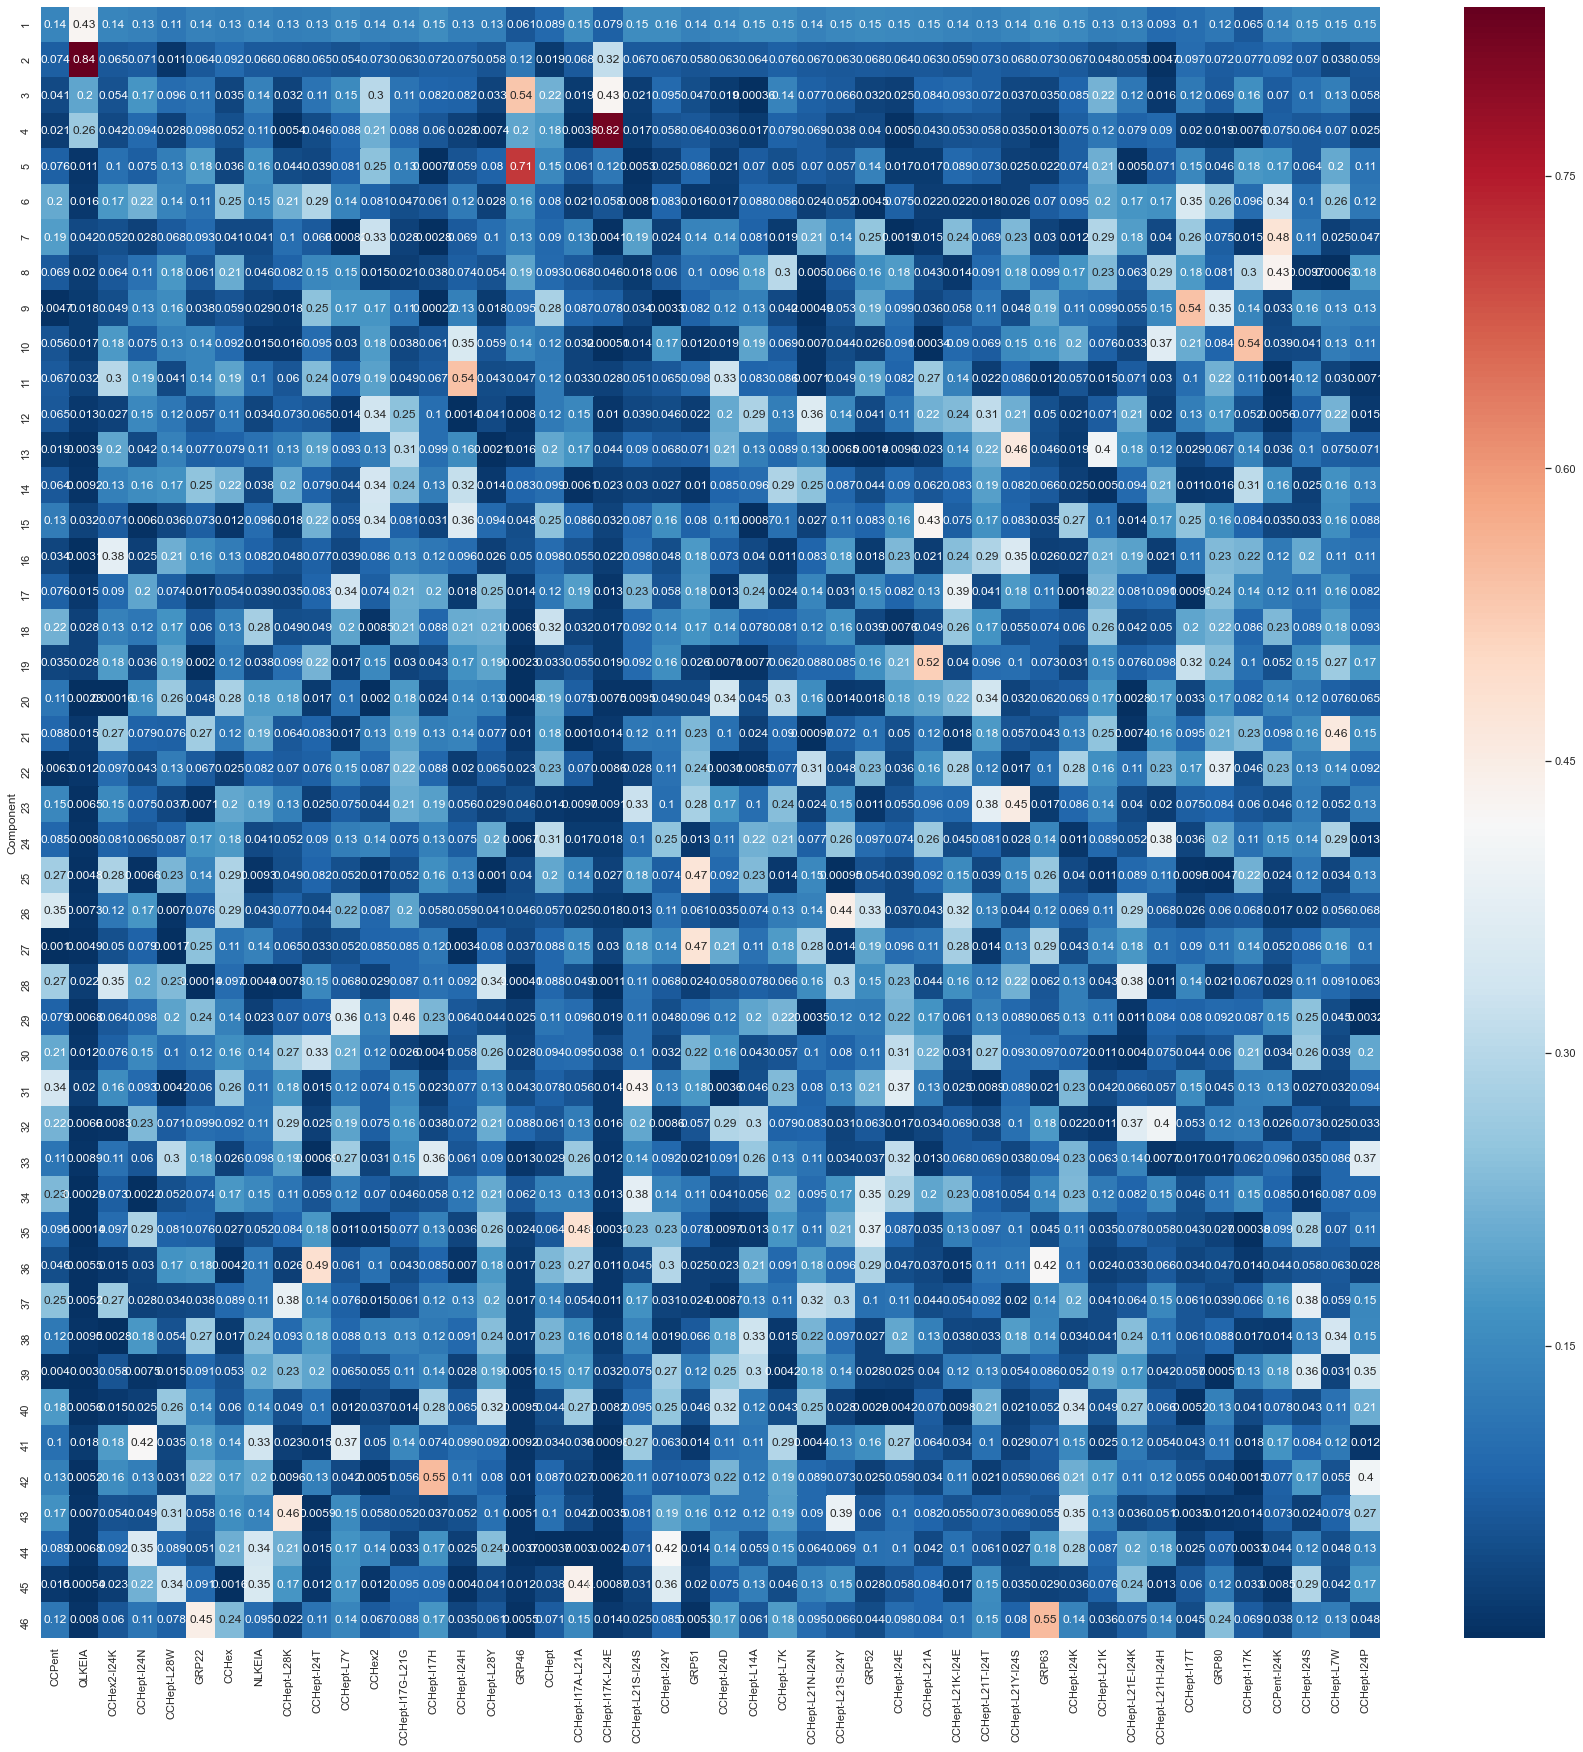

In [40]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=pca_components.abs(), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [41]:
top_pca_components = []
for row in range(pca_components.shape[0]):
    indices = np.argsort(pca_components.abs().iloc[row])
    barrel_1 = ml.features[indices[-1]]
    barrel_2 = ml.features[indices[-2]]
    for barrel in [barrel_1, barrel_2]:
        if not barrel in top_pca_components:
            top_pca_components.append(barrel)

print('Top two barrels per PCA component:')
for barrel in top_pca_components:
    print(barrel)
print(len(top_pca_components))

Top two barrels per PCA component:
QLKEIA
GRP63
CCHept-I17K-L24E
GRP46
CCHex2
CCHept-I17T
CCPent-I24K
CCHept-L7K
GRP80
CCHept-I17K
CCHept-L21H-I24H
CCHept-I24H
CCHept-I24D
CCHept-L21N-I24N
CCHept-L21Y-I24S
CCHept-L21K
CCHept-L21A
CCHex2-I24K
CCHept-L21K-I24E
CCHept-L7Y
CCHept
NLKEIA
CCHept-L21T-I24T
CCHept-L7W
GRP22
GRP51
CCHex
CCHept-L21S-I24Y
CCPent
CCHept-L21E-I24K
CCHept-I17G-L21G
CCHept-I24T
CCHept-I24E
CCHept-L21S-I24S
CCHept-I24P
CCHept-I17H
GRP52
CCHept-I17A-L21A
CCHept-L28K
CCHept-I24S
CCHept-L14A
CCHept-I24K
CCHept-L28Y
CCHept-I24N
CCHept-I24Y
45


Relative contribution of each barrel to the different PCA components

In [42]:
col_sums = copy.deepcopy(pca_components).abs().sum(axis=0)
relative_pca_components = copy.deepcopy(pca_components).abs().div(col_sums, axis=1)

In [43]:
relative_pca_components

CCPent    QLKEIA  CCHex2-I24K  CCHept-I24N  CCHept-L28W  \
Component                                                              
1          0.026070  0.191835     0.026813     0.025015     0.020960   
2          0.013730  0.376081     0.012140     0.013273     0.002071   
3          0.007509  0.089359     0.010170     0.032112     0.017496   
4          0.003821  0.117579     0.007795     0.017604     0.005194   
5          0.014028  0.005101     0.019559     0.013977     0.023548   
6          0.037730  0.007235     0.032613     0.040724     0.025646   
7          0.034190  0.018997     0.009707     0.005200     0.012394   
8          0.012648  0.009154     0.012078     0.019571     0.032055   
9          0.000875  0.008194     0.009089     0.024866     0.028482   
10         0.010310  0.007630     0.033627     0.014001     0.024451   
11         0.012321  0.014240     0.056136     0.034678     0.007552   
12         0.011975  0.006066     0.004974     0.027759     0.021416   
13         0.003425  0.001741     0.036816     0.007761     0.024803   
14         0.011791  0.004144     0.025054     0.028916     0.030187   
15         0.023228  0.014212     0.013219     0.001116     0.006638   
16         0.006335  0.001408     0.070529     0.004626     0.039006   
17         0.014107  0.006565     0.016911     0.036795     0.013504   
18         0.039947  0.012682     0.025166     0.021636     0.030501   
19         0.006482  0.012579     0.034042     0.006795     0.035238   
20         0.020916  0.001046     0.000030     0.029095     0.047899   
21         0.016229  0.006671     0.049836     0.014791     0.013887   
22         0.001168  0.005543     0.018164     0.007962     0.022978   
23         0.026983  0.002915     0.028620     0.014039     0.006853   
24         0.015774  0.003606     0.015083     0.012106     0.015948   
25         0.050696  0.002164     0.053352     0.001227     0.041781   
26         0.064764  0.003296     0.022008     0.031820     0.001275   
27         0.000189  0.002213     0.009319     0.014668     0.000305   
28         0.050374  0.009763     0.064688     0.037499     0.042552   
29         0.014594  0.003041     0.011964     0.018202     0.035844   
30         0.038024  0.005239     0.014311     0.027526     0.018539   
31         0.063320  0.009145     0.029198     0.017276     0.000763   
32         0.040810  0.002954     0.001552     0.043194     0.013005   
33         0.020770  0.004019     0.020229     0.011273     0.055624   
34         0.042588  0.000129     0.013622     0.000411     0.009555   
35         0.017607  0.000063     0.018169     0.053311     0.014816   
36         0.008534  0.002455     0.002884     0.005649     0.030875   
37         0.045807  0.002338     0.049955     0.005169     0.006263   
38         0.022039  0.004276     0.000527     0.032829     0.009940   
39         0.000732  0.001364     0.010810     0.001394     0.002769   
40         0.032729  0.002520     0.002824     0.004659     0.047139   
41         0.019179  0.008063     0.034224     0.078474     0.006357   
42         0.024224  0.002318     0.029210     0.024163     0.005671   
43         0.030540  0.003141     0.010097     0.009171     0.056020   
44         0.016473  0.003077     0.017280     0.066015     0.016351   
45         0.002828  0.000242     0.004292     0.040434     0.061506   
46         0.021585  0.003595     0.011313     0.021212     0.014343   

              GRP22     CCHex    NLKEIA  CCHept-L28K  CCHept-I24T  ...  \
Component                                                          ...   
1          0.024800  0.022689  0.025157     0.025977     0.025625  ...   
2          0.011600  0.016231  0.011873     0.013544     0.012616  ...   
3          0.020075  0.006188  0.024463     0.006474     0.021623  ...   
4          0.017880  0.009146  0.019138     0.001082     0.008910  ...   
5          0.032846  0.006369  0.029113     0.008713     0.007615  ...   
6          0.020029  0.044448  0.02669

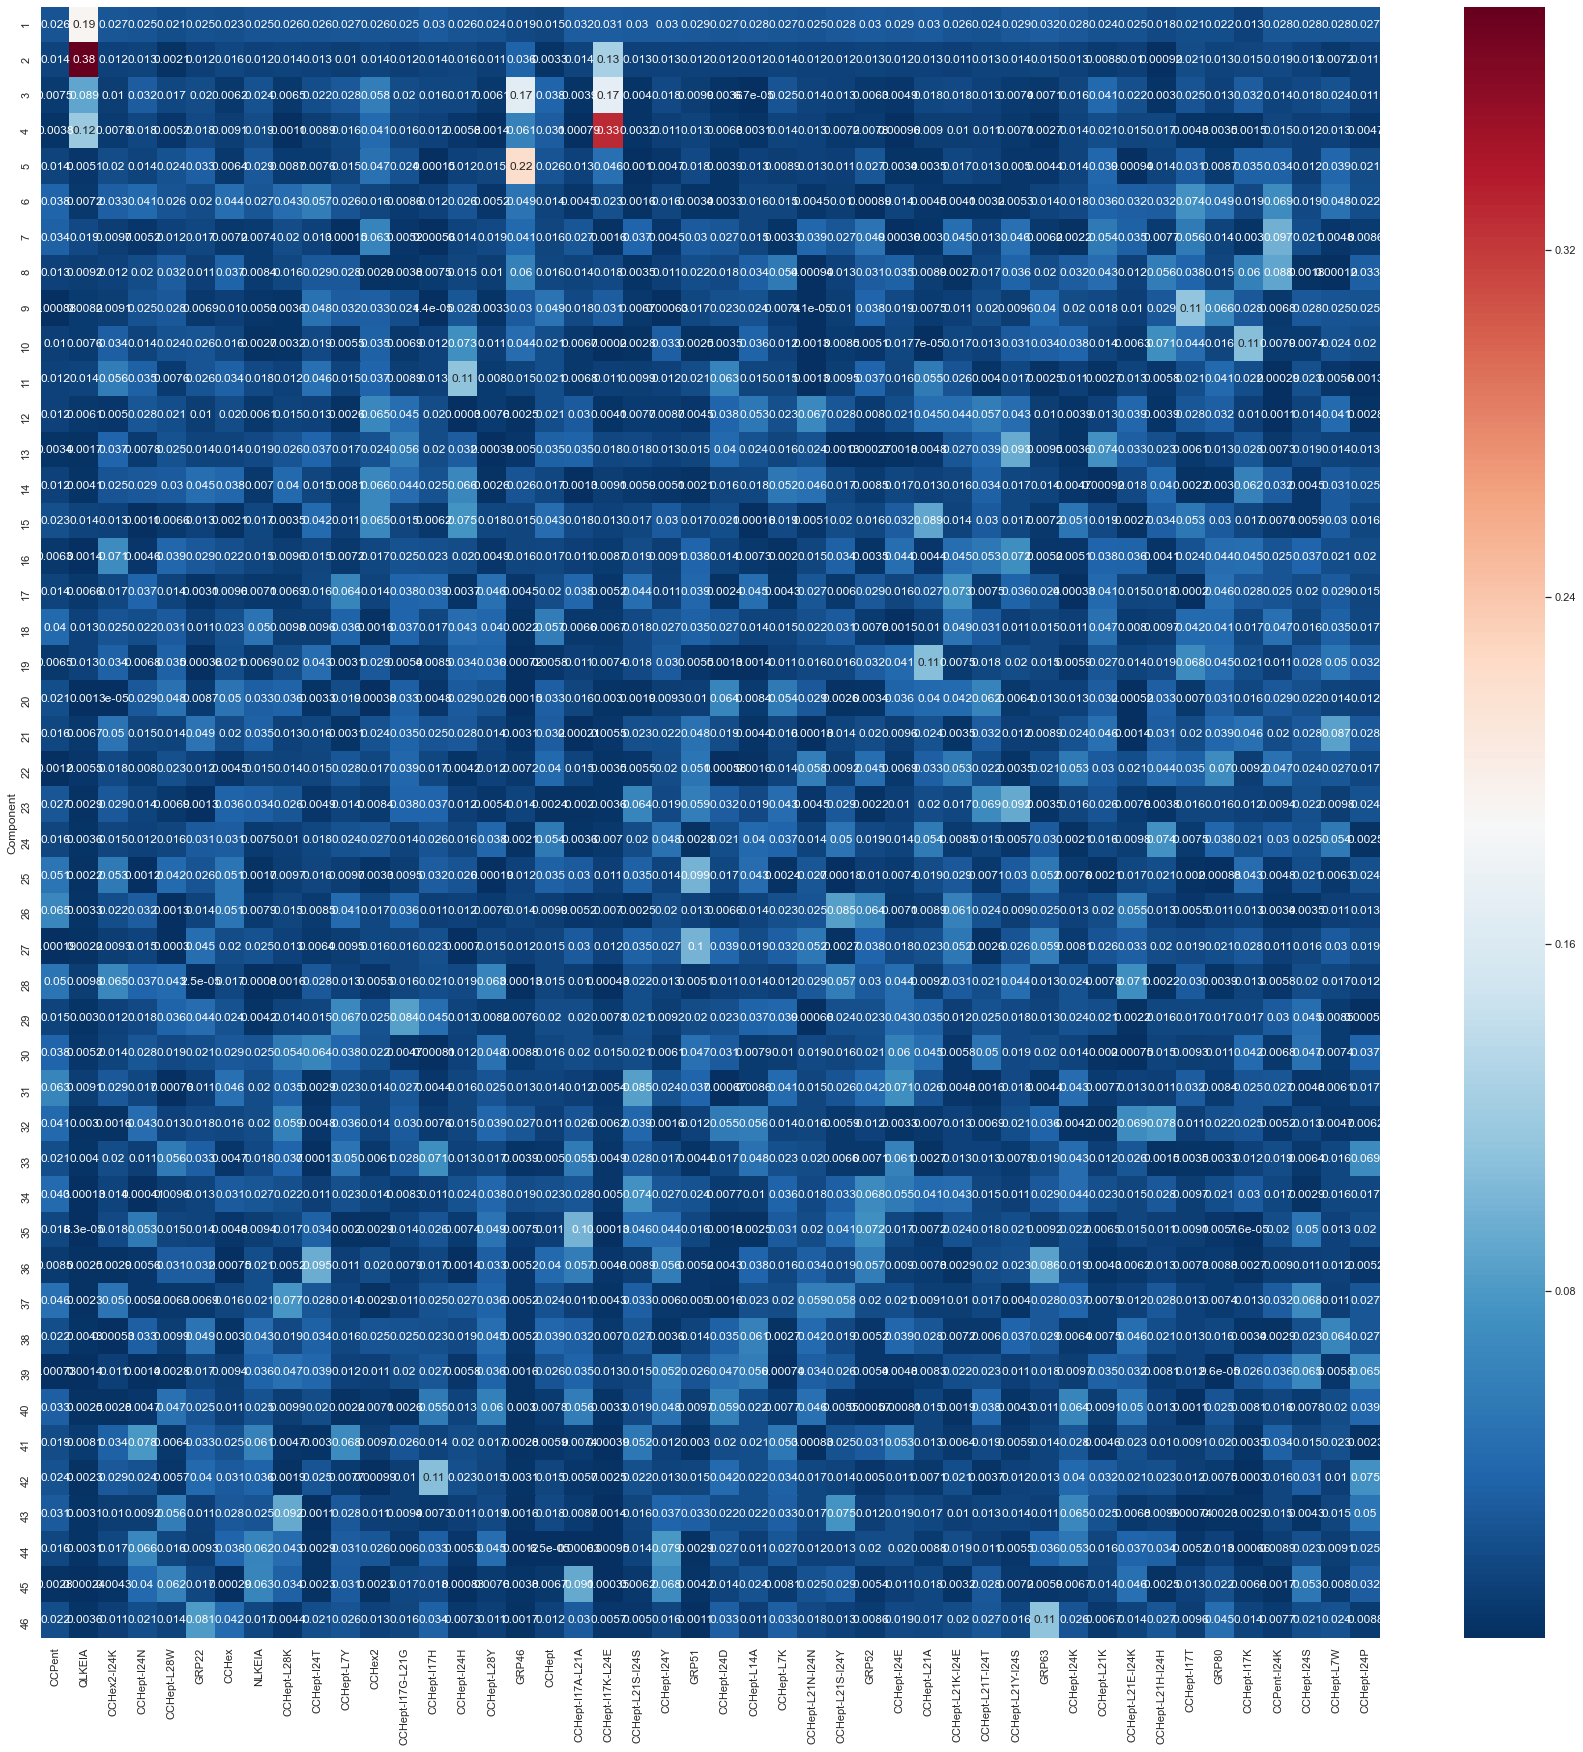

In [44]:
plt.rcParams['figure.figsize'] = (30, 30)  # Sets figure size
sns.heatmap(data=relative_pca_components, cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True)
plt.savefig('{}/PCA_component_relative_heatmap.svg'.format(ml.results_dir))
plt.rcParams['figure.figsize'] = (10, 10)  # Resets default figure size

In [86]:
def plot_scatter(x_data, y_data, dimensions, categories, results_dir, plot_id):
    """
    """
    
    from matplotlib.colors import BASE_COLORS, CSS4_COLORS
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch

    colours = [key for key, val in BASE_COLORS.items()]
    extra_colours = [key for key, val in CSS4_COLORS.items()]
    # random.shuffle(extra_colours)
    colours += extra_colours[::-1]
    markers = ['o', 'x', '^', '*']

    cat_colours = {}
    cat_markers = {}
    for index, cat in enumerate(categories):
        if index == 0:
            current_colour = colours[index]
            marker_count = 0
            cat_colours[cat] = current_colour
            cat_markers[cat] = markers[marker_count]
        else:
            if categories[index-1] == cat:
                cat_colours[cat] = current_colour
                cat_markers[cat] = markers[marker_count]
            elif categories[index-1].split('_')[0] == cat.split('_')[0]:
                cat_colours[cat] = current_colour
                marker_count += 1
                cat_markers[cat] = markers[marker_count]
            else:
                current_colour = colours[index]
                cat_colours[cat] = current_colour
                marker_count = 0
                cat_markers[cat] = markers[marker_count] 

    fig = plt.figure()
    if dimensions == 2:
        ax = fig.add_subplot(111)
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], c=cat_colours[y], marker=cat_markers[y])
    elif dimensions == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, y in np.ndenumerate(y_data):
            scatter = ax.scatter(x_data[i[0],0], x_data[i[0],1], x_data[i[0],2], c=cat_colours[y],
                                 marker=cat_markers[y])

    legend_elements = []
    for cat, colour in cat_colours.items():
        marker = cat_markers[cat]
        legend_elements.append(Line2D([0], [0], marker=marker, color=colour, label=cat, markerfacecolor=colour))
    ax.legend(handles=legend_elements, loc='upper right', title='Classes')

    plt.savefig('{}/{}_{}_PCA_plot.svg'.format(results_dir, plot_id, str(dimensions)))
    plt.show()

Scatter plots of data transformed to PCA dimensions

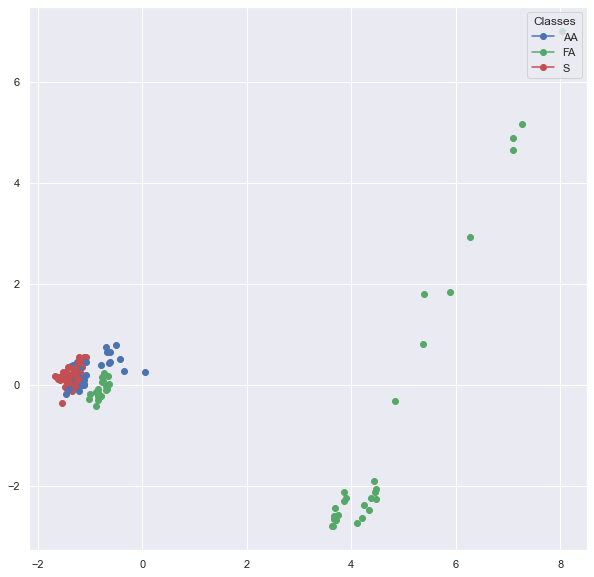

In [46]:
# Runs PCA and transforms data to 2 dimensions 
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_fitted = pca_2d.fit(X=ml.x)
X_reduced_2d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 2D scatter plot
plot_scatter(
    x_data=X_reduced_2d, y_data=ml.y, dimensions=2, categories=['AA', 'FA', 'S'],
    results_dir=ml.results_dir, plot_id='All_data_2D'
)

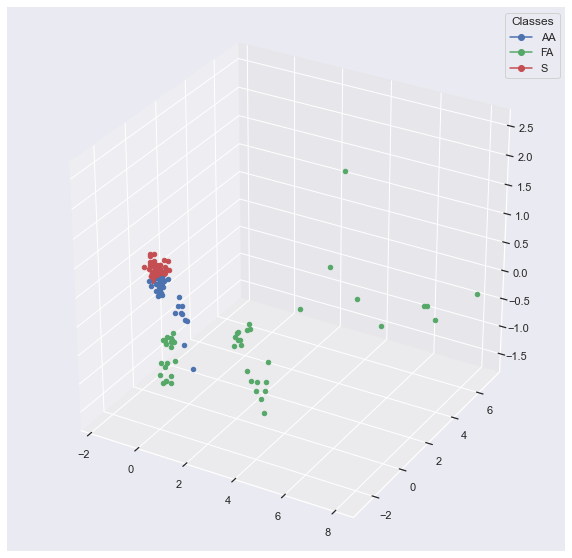

In [47]:
# Runs PCA and transforms data to 3 dimensions 
from sklearn.decomposition import PCA
pca_3d = PCA(n_components=3)
pca_fitted = pca_3d.fit(X=ml.x)
X_reduced_3d = pca_fitted.transform(X=ml.x)

# Plots transformed data on 3D scatter plot
plot_scatter(
    x_data=X_reduced_3d, y_data=ml.y, dimensions=3, categories=['AA', 'FA', 'S'],
    results_dir=ml.results_dir, plot_id='All_data_3D'
)

##### Train models with different numbers of features and/or PCA components

- All features

Runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [48]:
n_components_pca = None  # Specifies not to run PCA
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

score_dict = OrderedDict({'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
all_feat_random_cv_searches = {}

scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]
for algorithm in algorithms:
    for resampling_method in resampling_methods:
        fixed_params = ml.define_fixed_model_params(clf=algorithm())
        tuned_params = ml.define_tuned_model_params(clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop)
        nested_cv_search = ml.run_nested_CV(
            clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups, selected_features=ml.features,
            n_components_pca=n_components_pca, run='randomsearch', fixed_params=fixed_params,
            tuned_params=tuned_params, train_scoring_func='accuracy', test_scoring_funcs=scoring_funcs,
            resampling_method=resampling_method, n_iter=n_iter, cv_folds_inner_loop=cv_folds_inner_loop,
            cv_folds_outer_loop=cv_folds_outer_loop, draw_conf_mat=False
        )

        score_dict['Algorithm'].append(algorithm.__name__)
        score_dict['Resampling_method'].append(resampling_method)
        score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
        score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
        all_feat_random_cv_searches['{}__{}'.format(algorithm.__name__, resampling_method)] = nested_cv_search

        for index, model in enumerate(nested_cv_search['outer_loop_models']):
            print('\n\n\n\n\n')
            print('{}: {}'.format(algorithm.__name__, resampling_method))
            print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
            print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

all_feat_random_search_score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.896551724137931






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.896551724137931






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.8620689655172413






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.9310344827586207






LogisticRegression: no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.9642857142857143






KNeighborsClassifier: no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'distance', 'p': 2, 'n_nei

In [49]:
all_feat_random_search_score_df

Algorithm Resampling_method  Average_accuracy  Std_dev_accuracy
0    LogisticRegression      no_balancing          0.910099          0.034781
1  KNeighborsClassifier      no_balancing          0.860837          0.023804
2            GaussianNB      no_balancing          0.812315          0.036146
3             LinearSVC      no_balancing          0.867980          0.082864
4                   SVC      no_balancing          0.923645          0.059277

The algorithms perform fairly similarly, but will select SVC as performs best.

In [50]:
all_feat_random_cv_searches['SVC__no_balancing']['outer_loop_params']

[{'gamma': 0.0078125, 'C': 16.0},
 {'gamma': 0.1767766952966369, 'C': 64.0},
 {'gamma': 0.25, 'C': 1.4142135623730951},
 {'gamma': 0.000244140625, 'C': 1448.1546878700494},
 {'gamma': 0.015625, 'C': 16.0}]

In [51]:
all_feat_random_cv_searches['SVC__no_balancing']['best_outer_loop_params']

{'gamma': 0.0078125, 'C': 16.0}

In [52]:
all_feat_random_cv_searches['SVC__no_balancing']['test_scores']['accuracy']

[1.0,
 0.8275862068965517,
 0.9655172413793104,
 0.896551724137931,
 0.9285714285714286]

In [53]:
all_feat_pred = all_feat_random_cv_searches['SVC__no_balancing']['predictions']
all_feat_y_true = all_feat_random_cv_searches['SVC__no_balancing']['y_true']
all_feat_x_true = all_feat_random_cv_searches['SVC__no_balancing']['x_true']

all_feat_flat_pred = [pred for pred_array in all_feat_pred for pred in pred_array]
all_feat_flat_y_true = [y for y_array in all_feat_y_true for y in y_array]
all_feat_flat_x_true = np.array([x for x_array in all_feat_x_true for x in x_array])

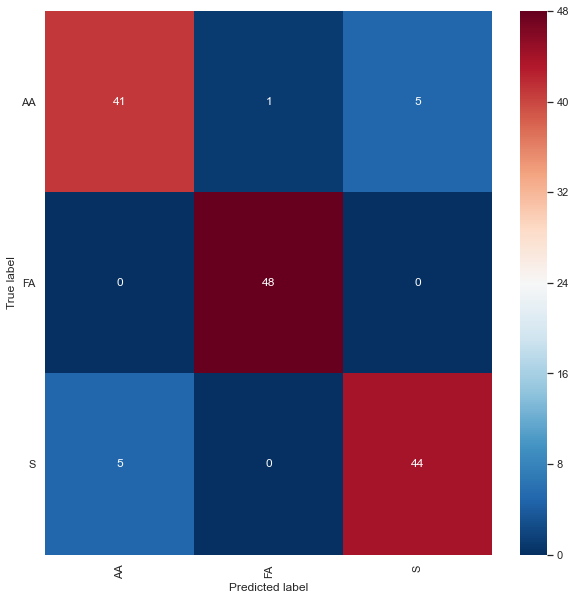

Normalised over true label (rows)


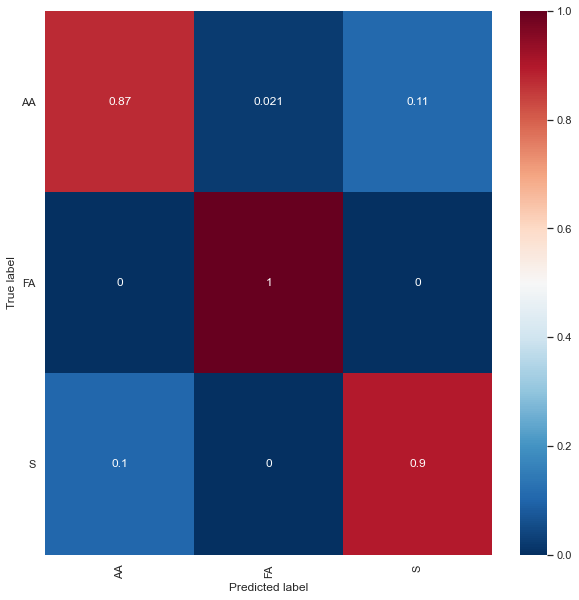

Normalised over pred label (columns)


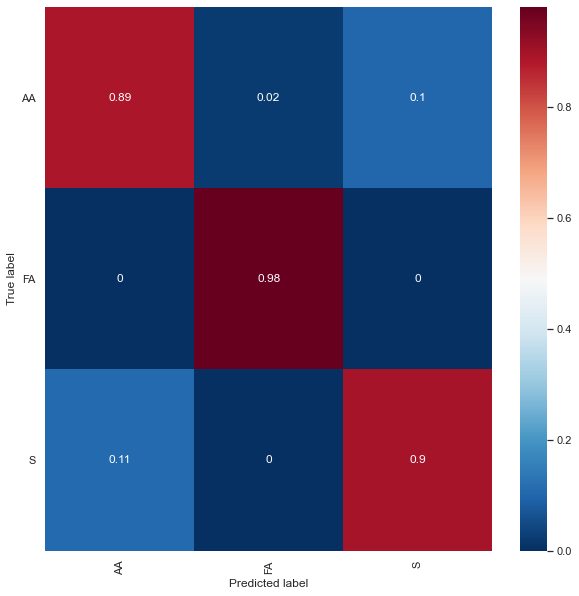

In [65]:
normalisation_methods = OrderedDict({None: [''],
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(all_feat_flat_y_true, all_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=all_feat_flat_y_true, y_pred=all_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/All_feat{}_confusion_matrix.svg'.format(ml.results_dir, method_label[0]))
    plt.show()

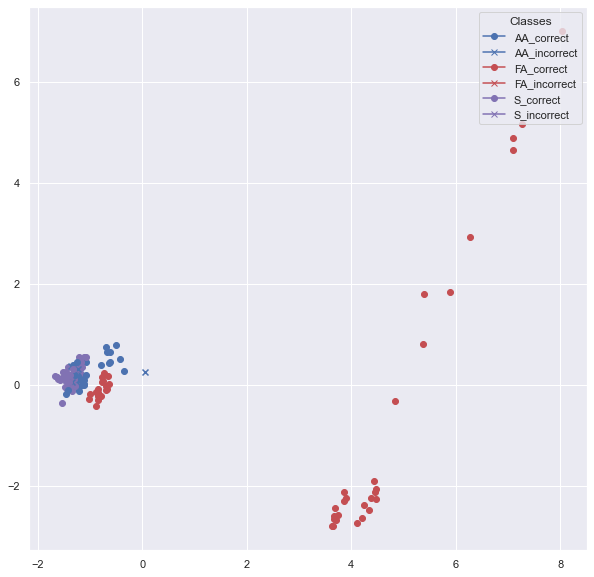

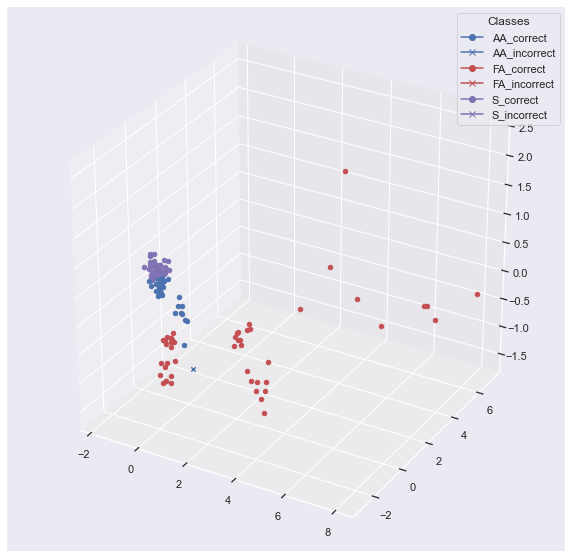

In [87]:
all_feat_X_test_reduced = pca_fitted.transform(X=all_feat_flat_x_true)
all_feat_pred_hue = []
for index, y in enumerate(all_feat_flat_y_true):
    if all_feat_flat_pred[index] == y:
        all_feat_pred_hue.append('{}_correct'.format(y))
        #pass
    else:
        all_feat_pred_hue.append('{}_incorrect'.format(y))

# Plots transformed data on 2D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=2,
    categories=['AA_correct', 'AA_incorrect', 'FA_correct', 'FA_incorrect', 'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# Plots transformed data on 3D scatter plot
x_train_pca = plot_scatter(
    x_data=all_feat_X_test_reduced, y_data=all_feat_pred_hue, dimensions=3,
    categories=['AA_correct', 'AA_incorrect', 'FA_correct', 'FA_incorrect', 'S_correct', 'S_incorrect'],
    results_dir=ml.results_dir, plot_id='Test_data'
)

# AA_incorrect = Value that is actually amino acid is predicted to be something else

- Feature reduction - how many barrels can I reduce the array to whilst maintaining / improving performance?

Compares 3 different methods of feature reduction / extraction with 8 different numbers of features. For each method, runs randomized search with nested cross-validation to spot check 5 different ML algorithms with 100 different combinations of the parameters to be optimised. Inner cross-validation loop involves:
- feature selection
- standardisation of the data (i.e. subtraction of the mean and division by the standard deviation) for each feature
- randomized search of 100 different hyperparameter combinations for the selected ML algorithm

In [57]:
cv_folds_inner_loop = 5  # Number of splits in nested cross-validation inner loop
cv_folds_outer_loop = 5  # Number of splits in nested cross-validation inner loop
n_iter = 100  # Number of parameter combinations to test in RandomisedSearchCV

num_features = [1, 2, 3, 5, 10, 15, 20, 30]
red_methods = ['anova', 'tree', 'top_pca_components']  # 'pca' - can't use to reduce number of barrels
red_data = {'pca': {'selected_features': ml.features},
            'anova': {'selected_features': f_classif_top_barrels['Feature'].tolist()},
            'tree': {'selected_features': tree_top_barrels['Feature'].tolist()},
            'top_pca_components': {'selected_features': top_pca_components}}
resampling_methods = ['no_balancing']
algorithms = [LogisticRegression, KNeighborsClassifier, GaussianNB, LinearSVC, SVC]

score_dict = OrderedDict({'Number_of_features': [],
                          'Feature_reduction_method': [],
                          'Algorithm': [],
                          'Resampling_method': [],
                          'Average_accuracy': [],
                          'Std_dev_accuracy': []})
scoring_funcs={accuracy_score: {},
               recall_score: {'average': 'macro',
                              'zero_division': 0},
               precision_score: {'average': 'macro',
                                 'zero_division': 0},
               f1_score: {'average': 'macro',
                          'zero_division': 0}}

red_feat_random_cv_searches = {}
for num in num_features:
    for red_method in red_methods:
        for algorithm in algorithms:
            for resampling_method in resampling_methods:
                fixed_params = ml.define_fixed_model_params(clf=algorithm())
                tuned_params = ml.define_tuned_model_params(
                    clf=algorithm(), x_train=ml.x, n_folds=cv_folds_inner_loop
                )
                if red_method == 'pca':
                    selected_features = red_data['pca']['selected_features']
                    n_components_pca = num
                else:
                    selected_features = red_data['pca']['selected_features'][:num]
                    n_components_pca = None

                nested_cv_search = ml.run_nested_CV(
                    clf=algorithm, x=ml.x, y=ml.y, groups=ml.groups,
                    selected_features=selected_features, n_components_pca=n_components_pca, run='randomsearch',
                    fixed_params=fixed_params, tuned_params=tuned_params, train_scoring_func='accuracy',
                    test_scoring_funcs=scoring_funcs, resampling_method=resampling_method, n_iter=n_iter,
                    cv_folds_inner_loop=cv_folds_inner_loop, cv_folds_outer_loop=cv_folds_outer_loop,
                    draw_conf_mat=False
                )

                score_dict['Number_of_features'].append(num)
                score_dict['Feature_reduction_method'].append(red_method)
                score_dict['Algorithm'].append(algorithm.__name__)
                score_dict['Resampling_method'].append(resampling_method)
                score_dict['Average_accuracy'].append(nested_cv_search['average_test_scores']['accuracy'])
                score_dict['Std_dev_accuracy'].append(nested_cv_search['std_test_scores']['accuracy'])
                red_feat_random_cv_searches[
                    '{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method)
                ] = nested_cv_search

                for index, model in enumerate(nested_cv_search['outer_loop_models']):
                    print('\n\n\n\n\n')
                    print('{}__{}__{}__{}'.format(num, red_method, algorithm.__name__, resampling_method))
                    print('Parameters: {}'.format(nested_cv_search['outer_loop_params'][index]))
                    print('Accuracy: {}'.format(nested_cv_search['test_scores']['accuracy'][index]))

red_feat_random_search_score_df = pd.DataFrame(score_dict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))








1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.3448275862068966






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.6551724137931034






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.4827586206896552






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.6551724137931034






1__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.5714285714285714






1__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n







1__tree__SVC__no_balancing
Parameters: {'gamma': 5.656854249492381, 'C': 724.0773439350247}
Accuracy: 0.6896551724137931






1__tree__SVC__no_balancing
Parameters: {'gamma': 2.0, 'C': 5792.618751480198}
Accuracy: 0.4482758620689655






1__tree__SVC__no_balancing
Parameters: {'gamma': 4.0, 'C': 16.0}
Accuracy: 0.5172413793103449






1__tree__SVC__no_balancing
Parameters: {'gamma': 0.001953125, 'C': 16384.0}
Accuracy: 0.6551724137931034






1__tree__SVC__no_balancing
Parameters: {'gamma': 0.0625, 'C': 16384.0}
Accuracy: 0.5357142857142857






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.6206896551724138






1__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.4482758620689655






1__top_pca_components__LogisticRegressi

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' 







2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.5862068965517241






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.7931034482758621






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.1}
Accuracy: 0.5172413793103449






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.7241379310344828






2__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.6428571428571429






2__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 







2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.6551724137931034






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.5862068965517241






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.6896551724137931






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 316.22776601683796}
Accuracy: 0.6551724137931034






2__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.6428571428571429






2__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski', 'n_jobs': -1, 'weights': 'd

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.6206896551724138






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.6206896551724138






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.6551724137931034






2__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbf

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 100000.0}
Accuracy: 0.6896551724137931






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.7241379310344828






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.6896551724137931






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.6206896551724138






3__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.7142857142857143






3__anova__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkow

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:







3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.7241379310344828






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.7241379310344828






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3162.2776601683795}
Accuracy: 0.6206896551724138






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.6896551724137931






3__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.7142857142857143






3__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'minkowski

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 0.31622776601683794}
Accuracy: 0.6551724137931034






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.7586206896551724






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.6206896551724138






3__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.6896551724137931






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.6206896551724138






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.6551724137931034






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.8275862068965517






5__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.75






5__anova__KNeighborsClassifier__no_balancing
Parameters: {'me

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 







5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 3.1622776601683795}
Accuracy: 0.7931034482758621






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.6896551724137931






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.7586206896551724






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.7931034482758621






5__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.7857142857142857






5__tree__KNeighborsClassifier__no_balancing
Parameters: {'metric': 'mink

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.7586206896551724






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.7931034482758621






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.6896551724137931






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1000.0}
Accuracy: 0.6896551724137931






5__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.6785714285714286








/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10000.0}
Accuracy: 0.8275862068965517






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.8620689655172413






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8275862068965517






10__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100000.0}
Accuracy: 0.9310344827586207






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.8620689655172413






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.6896551724137931






10__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_c

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have

Range tested: [1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04 3.16227766e+04
 1.00000000e+05]
Value selected: 100000.0






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}
Accuracy: 0.7931034482758621






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.7931034482758621






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 10.0}
Accuracy: 0.6896551724137931






10__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', '

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 







15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.8275862068965517






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3162.2776601683795}
Accuracy: 0.9310344827586207






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.896551724137931






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.9310344827586207






15__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.8571428571428571






15__anova__KNeighborsClassifier__no_balancing
Parame

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.9310344827586207






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.896551724137931






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 316.22776601683796}
Accuracy: 0.8620689655172413






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.896551724137931






15__tree__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1000.0}
Accuracy: 0.7857142857142857






15__tree__KNeighborsClassif

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.7931034482758621






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.9310344827586207






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.896551724137931






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10.0}
Accuracy: 0.896551724137931






15__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 1.0






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31622.776601683792}
Accuracy: 0.8275862068965517






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.896551724137931






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 100.0}
Accuracy: 0.7931034482758621






20__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.8571428571428571






20__anova__KNeighborsClassifier__no_balancing
P

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.896551724137931






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.9310344827586207






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.896551724137931






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31.622776601683793}
Accuracy: 0.896551724137931






20__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 31622.776601683792}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:







30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'ovr', 'C': 1.0}
Accuracy: 0.896551724137931






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.8620689655172413






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'sag', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.8275862068965517






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 10000.0}
Accuracy: 0.8620689655172413






30__anova__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy: 0.8214285714285714






30__anova__KNeighborsClassifier__no_balancing
Parameters: {'met

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)








30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 31.622776601683793}
Accuracy: 0.7931034482758621






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 3.1622776601683795}
Accuracy: 0.8620689655172413






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'multinomial', 'C': 1.0}
Accuracy: 0.8620689655172413






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'newton-cg', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 100.0}
Accuracy: 0.7931034482758621






30__top_pca_components__LogisticRegression__no_balancing
Parameters: {'n_jobs': -1, 'solver': 'saga', 'penalty': 'l1', 'multi_class': 'multinomial', 'C': 0.31622776601683794}
Accuracy

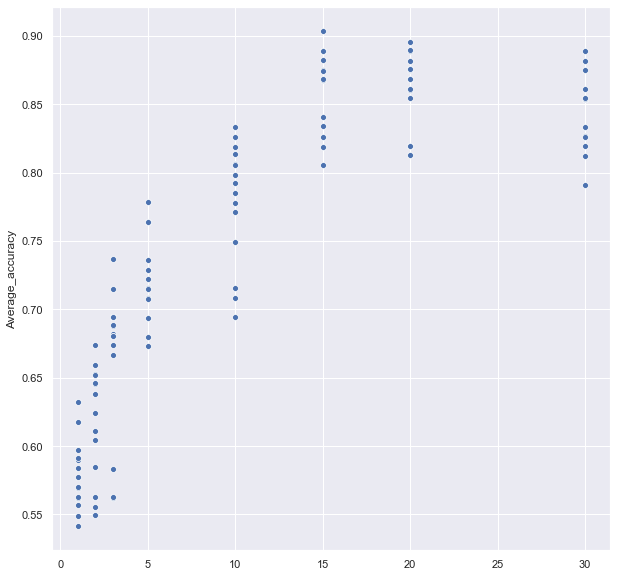

In [66]:
plt.clf()
sns.scatterplot(x=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                   3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                   5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                   10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
                   15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
                   20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
                   30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
                y=red_feat_random_search_score_df['Average_accuracy'])
plt.savefig('{}/Number_of_features_vs_performance_scatter_plot.svg'.format(ml.results_dir))
plt.show()

So, can achieve similar level of performance with 15 barrels

In [59]:
red_feat_random_search_score_df[red_feat_random_search_score_df['Number_of_features'] == 15]

Number_of_features Feature_reduction_method             Algorithm  \
75                  15                    anova    LogisticRegression   
76                  15                    anova  KNeighborsClassifier   
77                  15                    anova            GaussianNB   
78                  15                    anova             LinearSVC   
79                  15                    anova                   SVC   
80                  15                     tree    LogisticRegression   
81                  15                     tree  KNeighborsClassifier   
82                  15                     tree            GaussianNB   
83                  15                     tree             LinearSVC   
84                  15                     tree                   SVC   
85                  15       top_pca_components    LogisticRegression   
86                  15       top_pca_components  KNeighborsClassifier   
87                  15       top_pca_components            GaussianNB   
88                  15       top_pca_components             LinearSVC   
89                  15       top_pca_components                   SVC   

   Resampling_method  Average_accuracy  Std_dev_accuracy  
75      no_balancing          0.888670          0.040931  
76      no_balancing          0.867734          0.060230  
77      no_balancing          0.833744          0.058567  
78      no_balancing          0.874877          0.035605  
79      no_balancing          0.867980          0.040430  
80      no_balancing          0.874384          0.049409  
81      no_balancing          0.888916          0.040114  
82      no_balancing          0.805172          0.075469  
83      no_balancing          0.818966          0.078254  
84      no_balancing          0.903202          0.054897  
85      no_balancing          0.889163          0.050285  
86      no_balancing          0.868719          0.050210  
87      no_balancing          0.826355          0.043687  
88      no_balancing          0.840640          0.070443  
89      no_balancing          0.882020          0.034906

Many algorithms perform similarly well - have selected SVC with classifier with feature selection via tree method of measuring feature importances

In [60]:
red_feat_random_cv_searches['15__tree__SVC__no_balancing']['outer_loop_params']

[{'gamma': 0.011048543456039806, 'C': 181.01933598375618},
 {'gamma': 0.5, 'C': 2.8284271247461903},
 {'gamma': 0.7071067811865476, 'C': 22.627416997969522},
 {'gamma': 0.001953125, 'C': 512.0},
 {'gamma': 0.001953125, 'C': 724.0773439350247}]

In [61]:
red_feat_random_cv_searches['15__tree__SVC__no_balancing']['best_outer_loop_params']

{'gamma': 0.011048543456039806, 'C': 181.01933598375618}

In [62]:
red_feat_random_cv_searches['15__tree__SVC__no_balancing']['test_scores']['accuracy']

[0.9655172413793104,
 0.8275862068965517,
 0.8620689655172413,
 0.896551724137931,
 0.9642857142857143]

In [63]:
red_feat_pred = red_feat_random_cv_searches['15__tree__SVC__no_balancing']['predictions']
red_feat_y_true = red_feat_random_cv_searches['15__tree__SVC__no_balancing']['y_true']
red_feat_x_true = red_feat_random_cv_searches['15__tree__SVC__no_balancing']['x_true']

red_feat_flat_pred = [pred for pred_array in red_feat_pred for pred in pred_array]
red_feat_flat_y_true = [y for y_array in red_feat_y_true for y in y_array]
red_feat_flat_x_true = np.array([x for x_array in red_feat_x_true for x in x_array])

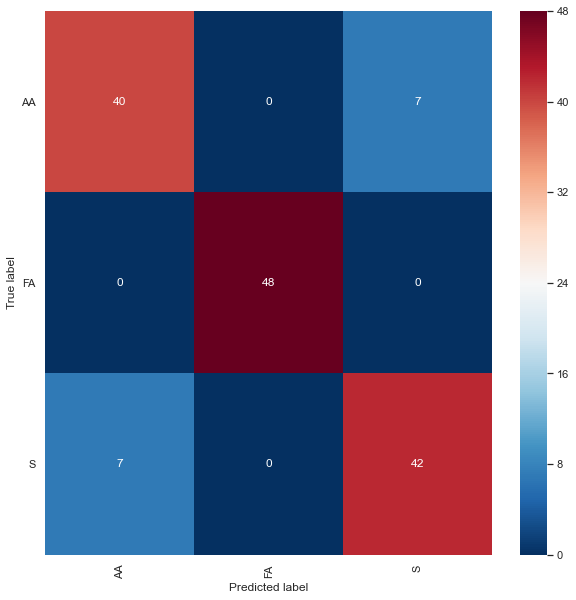

Normalised over true label (rows)


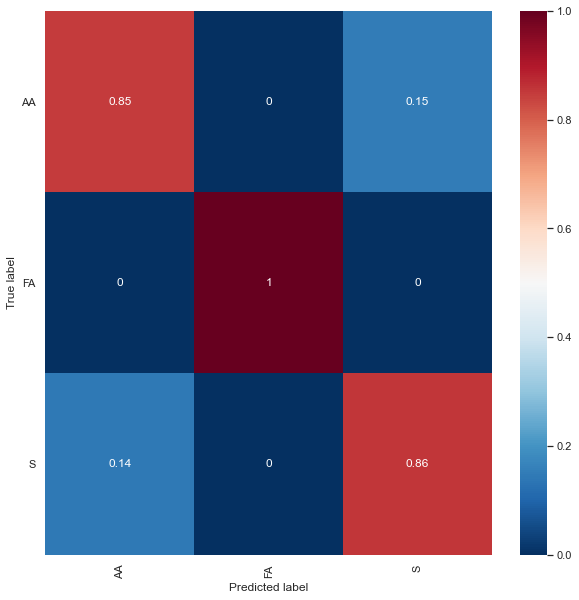

Normalised over pred label (columns)


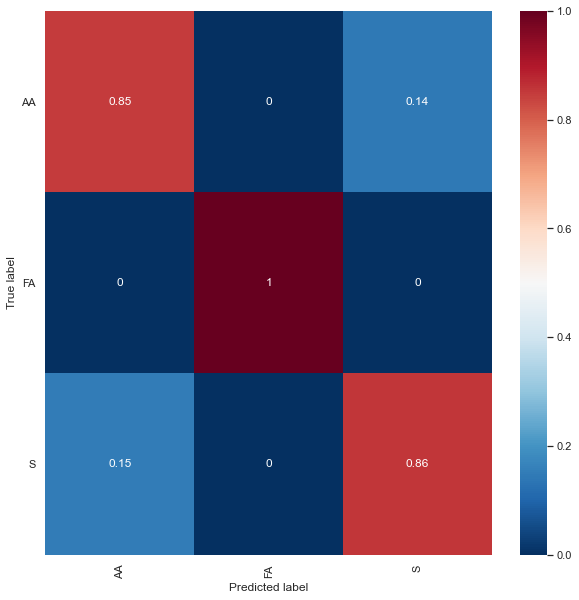

In [67]:
normalisation_methods = OrderedDict({None: [''],
                                     'true': ['_recall', 'rows'],
                                     'pred': ['_precision', 'columns']})
for method, method_label in normalisation_methods.items():
    if method is not None:
        print('Normalised over {} label ({})'.format(method, method_label[1]))
    plt.clf()
    labels = unique_labels(red_feat_flat_y_true, red_feat_flat_pred)
    # Below ensures that predicted and true labels are on the correct axes, so think carefully before updating!
    sns.heatmap(
        data=confusion_matrix(
            y_true=red_feat_flat_y_true, y_pred=red_feat_flat_pred, labels=labels, normalize=method
        ), cmap='RdBu_r', annot=True, xticklabels=True, yticklabels=True
    )
    ax = plt.gca()
    ax.set(xticklabels=labels, yticklabels=labels, xlabel='Predicted label', ylabel='True label')
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.savefig('{}/Selected_feat{}_confusion_matrix.svg'.format(ml.results_dir, method_label[0]))
    plt.show()

##### Comparison of original with reduced barrels dataset 

In [68]:
fixed_params_1 = ml.define_fixed_model_params(SVC())
fixed_params_2 = ml.define_fixed_model_params(SVC())
params_1 = {**fixed_params_1, **all_feat_random_cv_searches['SVC__no_balancing']['best_outer_loop_params']}
params_2 = {**fixed_params_2, **red_feat_random_cv_searches['15__tree__SVC__no_balancing']['best_outer_loop_params']}

F, p = ml.run_5x2_CV_paired_t_test(
    x=ml.x, y=ml.y, groups=ml.groups,
    selected_features_1=ml.features, selected_features_2=tree_top_barrels['Feature'].tolist()[:15],
    classifier_1=SVC, classifier_2=SVC,
    params_1=params_1, params_2=params_2,
    resampling_method_1='no_balancing', resampling_method_2='no_balancing',
    n_components_pca_1=None, n_components_pca_2=None,
    scoring_func='accuracy'
)

In [69]:
print(F, p)

2.0357142857142874 0.22394385419712762


So, no significant difference in performance when reduce number of barrels from 46 to 15.